# **Understanding Customer Churn, A Case of SyriaTel Communications**


# **Table of Contents**

>[Understanding Customer Churn, A Case of SyriaTel Communications](#scrollTo=gkGAn0-h33hE)

>[Table of Contents](#scrollTo=hXmogvdXeTHB)

>[Introduction](#scrollTo=4LVuiqH80Oa8)

>>>[Abstract](#scrollTo=e0551fPSNvhm)

>>>[Problem Statement](#scrollTo=c5P5IrBNNnfY)

>>>[Objectives](#scrollTo=YSIvkwUGr-1j)

>[Import Data and necessary Libraries](#scrollTo=1DNZpu9Xrro9)

>>[Exploratory Data Analysis (EDA) for categorical problems](#scrollTo=BTCXA7rbd0CL)

>>>>[1.Data pre-processing](#scrollTo=Htn-jxnveLCN)

>>>>[2 .EDA](#scrollTo=Htn-jxnveLCN)

>>[Data Shape](#scrollTo=zxG331FCeXju)

>>[Data Types](#scrollTo=CexpnXCsfC3z)

>>[Outliers](#scrollTo=CNdJ2hnufZCK)

>>>>[Conclusion on the subscription period outliers](#scrollTo=ePa8NGjjf-Fk)

>>>>[Checking for outliers on the customer service calls column](#scrollTo=LsBcVqZxgGVf)

>>>[Conclusion on the Customer Service Calls outliers](#scrollTo=4nOFkC_MgrEl)

>>[Multicollinearity](#scrollTo=A_T5bnDNgwDp)

>>[Creating Features](#scrollTo=FmoZmQ7rha3J)

>>[Statistical Summaries](#scrollTo=Z5DgckDpmJhF)

>>[Univariate Analysis](#scrollTo=fwCV0kfSmWVv)

>[Preprocessing Visualizations](#scrollTo=0nxwTftkFWpI)

>>[Churn Rate Overview](#scrollTo=izwXMR1EwToD)

>>[Churn Rate by State](#scrollTo=RoJWN4SYwmCk)

>>[Customer Service Calls by Churn](#scrollTo=gGtoAiFHv5Hp)

>>[Customer Service Calls with International Plan by Churn](#scrollTo=aVWMqBB5vuPZ)

>[Segmentation and Clustering](#scrollTo=ACPFw10Ab2-5)

>>[Determining the Optimal Number of Clusters](#scrollTo=6BXbaJYphob7)

>>[Analyzing Cluster Characteristics](#scrollTo=oNr79zJRi_fZ)

>>[Visualizations from the Clustering Analysis](#scrollTo=MwTHdkz9j3hJ)

>>>[Visualization 1: Cluster Distribution](#scrollTo=LW0YXhxbkEah)

>>>[Visualization 2: Churn Rate by Cluster](#scrollTo=sSfvq0H7kQvA)

>>>[Visualization 3: Average Call Duration by Cluster](#scrollTo=cxpWMdnrky-0)

>>>[Visualization 4: Radar Chart for Cluster Attributes](#scrollTo=UOsa30x7mLVj)

>>>[Visualization 5: Cluster Attributes Comparison](#scrollTo=bpral4x2oQXP)

>[Modeling](#scrollTo=lhYdJNDdrGWP)

>>[Baseline Model: Logistic Regression](#scrollTo=hpY9rGvAOhEw)

>>[Iteration 1.  Decision Tree Classifier](#scrollTo=gv8O6B9mpubr)

>>[Iteration 2.  Random Forest Classifier](#scrollTo=XBPONiX5VZ7K)

>>[Iteration 3. Gradient Boosting Classifier](#scrollTo=i-xAq58dVrWi)

>>[Feature Importance Visualization](#scrollTo=hneFN46LnZzJ)

>>[Hyperparameter Tuning for Top Two Models](#scrollTo=REzu0wc2AsfX)

>>>[Random Forest Classifier Model](#scrollTo=1123wUOBAxrm)

>>>[Gradient Boosting Classifier Model](#scrollTo=Pab2V_ycFMV_)

>>[Modeling Insights](#scrollTo=8hEhUKuJEgXu)

>[Mode Deployment](#scrollTo=JXJf8Je7k61A)

>[Conclusions And Recommendations](#scrollTo=J0Gu81LsEGAX)

>>[Conclusions:](#scrollTo=J0Gu81LsEGAX)

>>[Recommendations:](#scrollTo=J0Gu81LsEGAX)

>[Recommendations for Future Analysis](#scrollTo=NsV03nur6ifG)



# **Introduction**



### **Abstract**



In the competitive telecommunications landscape, retaining customers is just as important as acquiring new ones. SyriaTel, facing the challenge of increasing customer churn, intends to use data-driven insights to better understand and mitigate the factors that contribute to customer departure. This analysis delves into the complexities of customer behavior, service usage, and interaction patterns to uncover the root causes of churn. By identifying at-risk customers and the factors that influence their decision to leave, we hope to propose targeted strategies that increase customer satisfaction, foster loyalty, and, ultimately, reduce churn. SyriaTel hopes that by embarking on this endeavor, it will strengthen its market position and redefine its approach to customer relationship management, establishing a new standard for telecommunications service excellence.

### **Problem Statement**

SyriaTel is struggling to retain its customer base, as customer churn continues to rise. This churn not only affects the company's revenue but also raises the cost of acquiring new customers in order to retain market share. Identifying the factors that contribute to customer churn and predicting which customers are at risk allows SyriaTel to implement targeted retention strategies, thereby increasing customer loyalty and decreasing turnover.

This analysis looks into the patterns and predictors of customer churn at SyriaTel, a major telecommunications provider. Using customer usage data, service plans, and interaction history, we use statistical analysis and machine learning models to identify key churn drivers. The study's objectives are to segment the customer base, evaluate the impact of various service features on customer retention, and create a predictive model to identify at-risk customers. The findings of the analysis inform targeted interventions aimed at increasing customer satisfaction and loyalty, lowering churn rates, and fostering long-term business growth.

### Objectives


1. To utilize clustering techniques to segment SyriaTel's customer base into distinct groups based on usage patterns, demographics, and other relevant factors.

2. To assess the impact of various service features  on
customer retention using predictive modeling techniques.

3. To validate the predictive model's performance using appropriate evaluation metrics and refine it to improve accuracy and generalizability.

4. To evaluate the long-term effectiveness of implemented retention strategies through monitoring and analyzing churn rates over time.

5.   To formulate and recommend bespoke retention strategies based on the analytical findings.








# Import Data and necessary Libraries

In [ ]:
#1.import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

A peliminary review of the SyriaTel Dataset, acquired from [kaggle.com](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data), is essential for effective manipulation and insightful analysis and, dissecting the structure and nuances of the data to streamline the process of identifying patterns and predictors of churn.


The dataset contains the following columns:
0.	state, string. 2-letter code of the US state of customer residence
1.	account_length, numerical. Number of months the customer has been with the current telco provider.
2.	area_code, string="area_code_AAA" where AAA = 3-digit area code.
3.	phone_number, string. Customer Phone Number
4.	international_plan, (yes/no). The customer has international plan.
5.	voice_mail_plan, (yes/no). The customer has voice mail plan.
6.	number_vmail_messages, numerical. Number of voice-mail messages.
7.	total_day_minutes, numerical. Total minutes of day calls.
8.	total_day_calls, numerical. Total number of day calls.
9.	total_day_charge, numerical. Total charge of day calls.
10.	total_eve_minutes, numerical. Total minutes of evening calls.
11.	total_eve_calls, numerical. Total number of evening calls.
12.	total_eve_charge, numerical. Total charge of evening calls.
13.	total_night_minutes, numerical. Total minutes of night calls.
14.	total_night_calls, numerical. Total number of night calls.
15.	total_night_charge, numerical. Total charge of night calls.
16.	total_intl_minutes, numerical. Total minutes of international calls.
17.	total_intl_calls, numerical. Total number of international calls.
18.	total_intl_charge, numerical. Total charge of international calls
19.	number_customer_service_calls, numerical. Number of calls to customer service
20.	churn, (yes/no). Customer churn - target variable.



##Exploratory Data Analysis (EDA) for categorical problems

Performing exploratory analysis to extract meaningful insight from the data and identify the best features to be used for modeling.
####1.Data pre-processing
- Assumptions about data shape
- Missing values
- Data types
- Categorical variables
- Outliers or errors
- Feature Engineering/Creating features

####2 .EDA
Performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.
- Statistical Summary
- EDA Univariate Analysis
- EDA Bivariate Analysis
- EDA Multivariate Analysis
- Conclusion

##1.  Data Shape

Examining the shape of the datato be able to know the  extent of the available information and its dimensionality.This will enbale us to gauge the dataset's size, assess its complexity, and plan appropriate analyses or data processing steps accordingly

In [ ]:
#load the data set
syriaTel_customer = pd.read_csv('/content/syriaTel_customer.csv')
#date shape
data_shape = syriaTel_customer.shape
print("Shape of the dataset:", data_shape)


Shape of the dataset: (3333, 21)


In [ ]:
#to preview the 1st 5 rows
syriaTel_customer.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#to preview the last 5 rows
syriaTel_customer.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# More information about the data
syriaTel_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

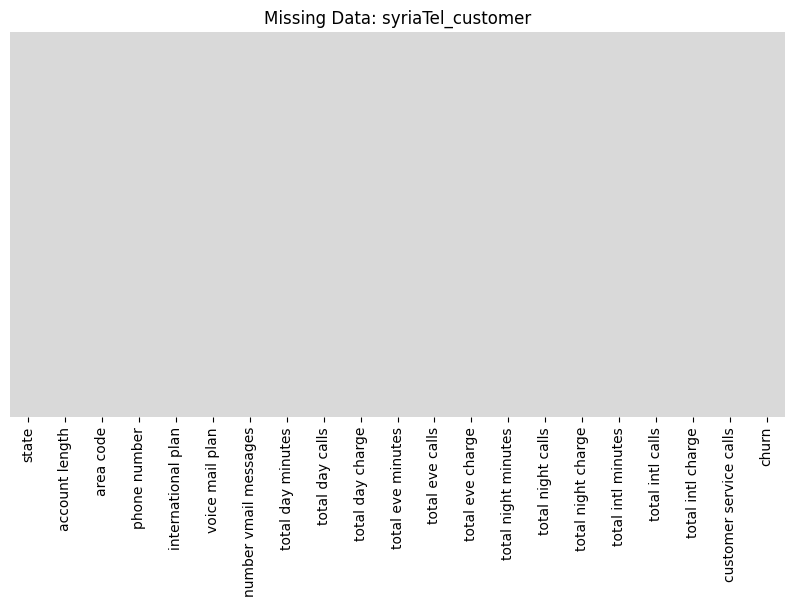

In [ ]:
#Missing values
#from the code above, it appears that there are no missing values. Below is a code for an overview of the same
# Heatmap
sns.heatmap(syriaTel_customer.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: syriaTel_customer')
plt.show()

- Since the figure shows a uniform colour, it means there are no missing values

##Data Types
We need to confirm that the variables are being assigned the correct data type to allow for easier analysis later on.

In [ ]:
# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(syriaTel_customer.select_dtypes(['object']).columns)



Non-Null Objects to Be Converted to Category
Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [ ]:
# Convert objects to category data type
syriaTel_cat = ['state','international plan','voice mail plan']

for colname in syriaTel_cat:
    syriaTel_customer[colname] = syriaTel_customer[colname].astype('category')

In [ ]:
#We will now use the phone number column to check if there are any duplicate customers
# Check for duplicates based on Phone number column
duplicates = syriaTel_customer.duplicated(subset=['phone number'])

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

There are no duplicate customers

##Outliers

In [ ]:
#Change of column name "account lengh" to better analyse the data
syriaTel_customer= syriaTel_customer.rename(columns={'account length': 'Subscription Period'})
syriaTel_customer.head()

,state,Subscription Period,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Checking for outliers on the columns'Subscription Period' and "Customer Service Calls" using the z-score method
syriaTel_Outliers1 = syriaTel_customer['Subscription Period']

# Calculate Z-score
z_scores = np.abs((syriaTel_Outliers1 - syriaTel_Outliers1.mean()) / syriaTel_Outliers1.std())

# To define threshold for outliers
threshold = 3

# Find outliers
outliers1 = syriaTel_Outliers1[z_scores > threshold]

print("Outliers1:")
print(outliers1)


Outliers1:
416     224
817     243
1408    232
1551    225
1751    225
1886    224
3216    221
Name: Subscription Period, dtype: int64


In [ ]:
#To find the relationship between the outliers and the Target Variable
#1. The correlation between subscription period and churning with and without outliers

#to get the count of churns for data with outliers
target_counts = syriaTel_customer['churn'].value_counts()

print("Count of 'True' and 'False' values in the churn:")
print(target_counts)


Count of 'True' and 'False' values in the churn:
False    2850
True      483
Name: churn, dtype: int64


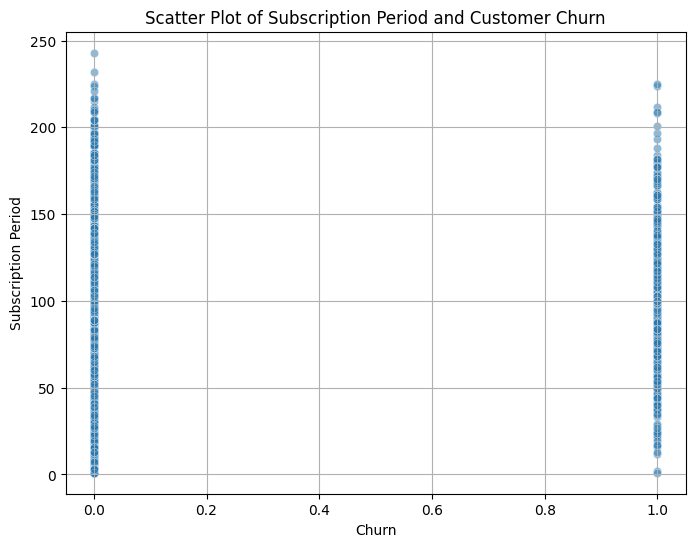

In [ ]:
#a scatter plot of the data with outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=syriaTel_customer, x='churn', y='Subscription Period', alpha=0.5)
plt.title('Scatter Plot of Subscription Period and Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Period')
plt.grid(True)
plt.show()

In [ ]:
#to get the count of churns for data without outliers
#Drop outliers
syriaTel_nooutliers1 = syriaTel_customer[z_scores <= threshold]
syriaTel_nooutliers1
target_counts1 = syriaTel_nooutliers1['churn'].value_counts()
print("Count of 'True' and 'False' values in the churn:")
print(target_counts1)

Count of 'True' and 'False' values in the churn:
False    2845
True      481
Name: churn, dtype: int64


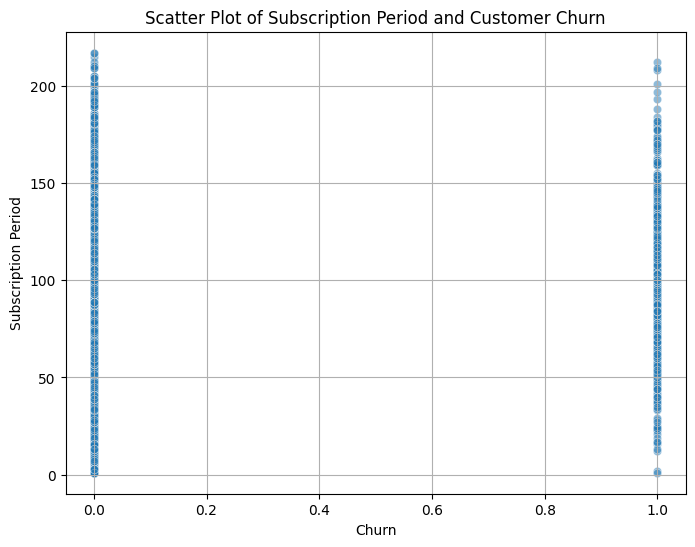

In [ ]:
#a scatter plot of the data without the outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=syriaTel_nooutliers1, x='churn', y='Subscription Period', alpha=0.5)
plt.title('Scatter Plot of Subscription Period and Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Period')
plt.grid(True)
plt.show()

####Conclusion on the subscription period outliers

Based on subscription period outliers(7), it shows the customers with the highest subscription period. Out of these 7 customers only 2 churned. From the relationship established, dropping the outliers does not significatly alter the outlook of the data(model). However It would be important to retain the outliers since 71% of the customers with highest subscripton did not churn. They could give important insights on how to retain customers.

####Checking for outliers on the customer service calls column


In [ ]:
#To check for the total customer service calls
Total_Cutsomer_calls = syriaTel_customer['customer service calls'].sum()
Total_Cutsomer_calls

5209

In [ ]:
# Checking for outliers on the column "Customer Service Calls" using the z-score method
syriaTel_Outliers2 = syriaTel_customer['customer service calls']

# Calculate Z-score
z_scores = np.abs((syriaTel_Outliers2 - syriaTel_Outliers2.mean()) / syriaTel_Outliers2.std())

# To define threshold for outliers
threshold = 3

# Find outliers
outliers2 = syriaTel_Outliers2[z_scores > threshold]

print("Outliers2:")
print(outliers2)

Outliers2:
332     7
522     7
542     9
694     6
721     6
778     6
902     7
908     6
974     6
1142    6
1273    6
1325    6
1407    6
1502    8
1638    6
1694    7
1831    7
1865    7
1912    8
1919    6
2223    6
2327    6
2380    9
2387    6
2428    6
2553    6
2786    6
2953    7
2958    6
2961    6
2979    7
3026    6
3081    6
3112    7
3190    6
Name: customer service calls, dtype: int64


In [ ]:
outliers2.info()

<class 'pandas.core.series.Series'>
Int64Index: 35 entries, 332 to 3190
Series name: customer service calls
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 560.0 bytes


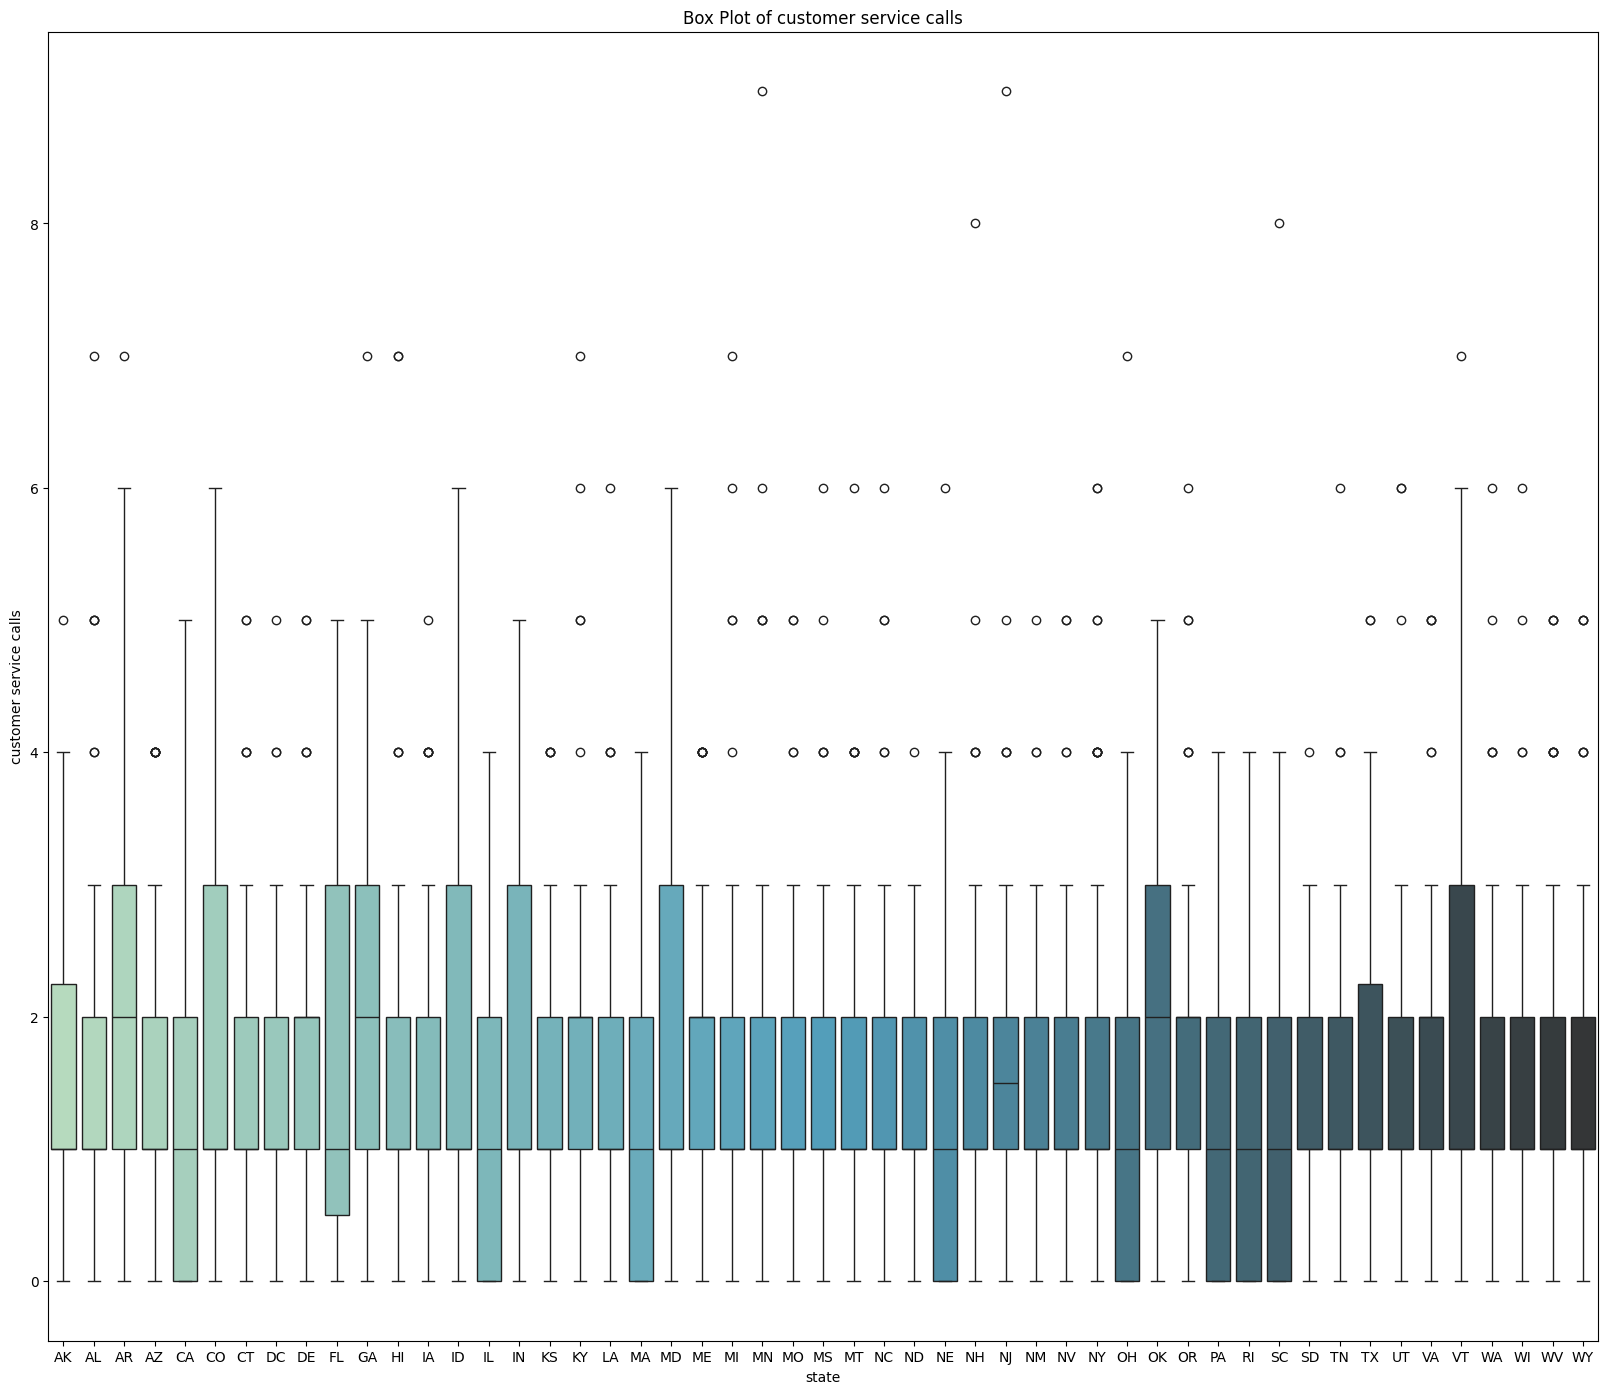

In [ ]:
#A visualization of the "customer service calls" with outliers using the box plots
# Creating a box plot
plt.figure(figsize = (20,17))
sns.boxplot(x='state', y='customer service calls', data=syriaTel_customer, palette='GnBu_d').set_title('Box Plot of customer service calls')
plt.show()

In [ ]:
#Checking to understand the realtionship between the outliers and customer churn
#1. To get the count of churns for data with outliers
target_counts2 = syriaTel_customer['churn'].value_counts()
print("Count of 'True' and 'False' values in the churn:")
print(target_counts)

Count of 'True' and 'False' values in the churn:
False    2850
True      483
Name: churn, dtype: int64


In [ ]:
#2. To get the count of churns for data without outliers
#Drop outliers
syriaTel_nooutliers2 = syriaTel_customer[z_scores <= threshold]
syriaTel_nooutliers2
target_counts2 = syriaTel_nooutliers2['churn'].value_counts()
print("Count of 'True' and 'False' values in the churn:")
print(target_counts2)

Count of 'True' and 'False' values in the churn:
False    2837
True      461
Name: churn, dtype: int64


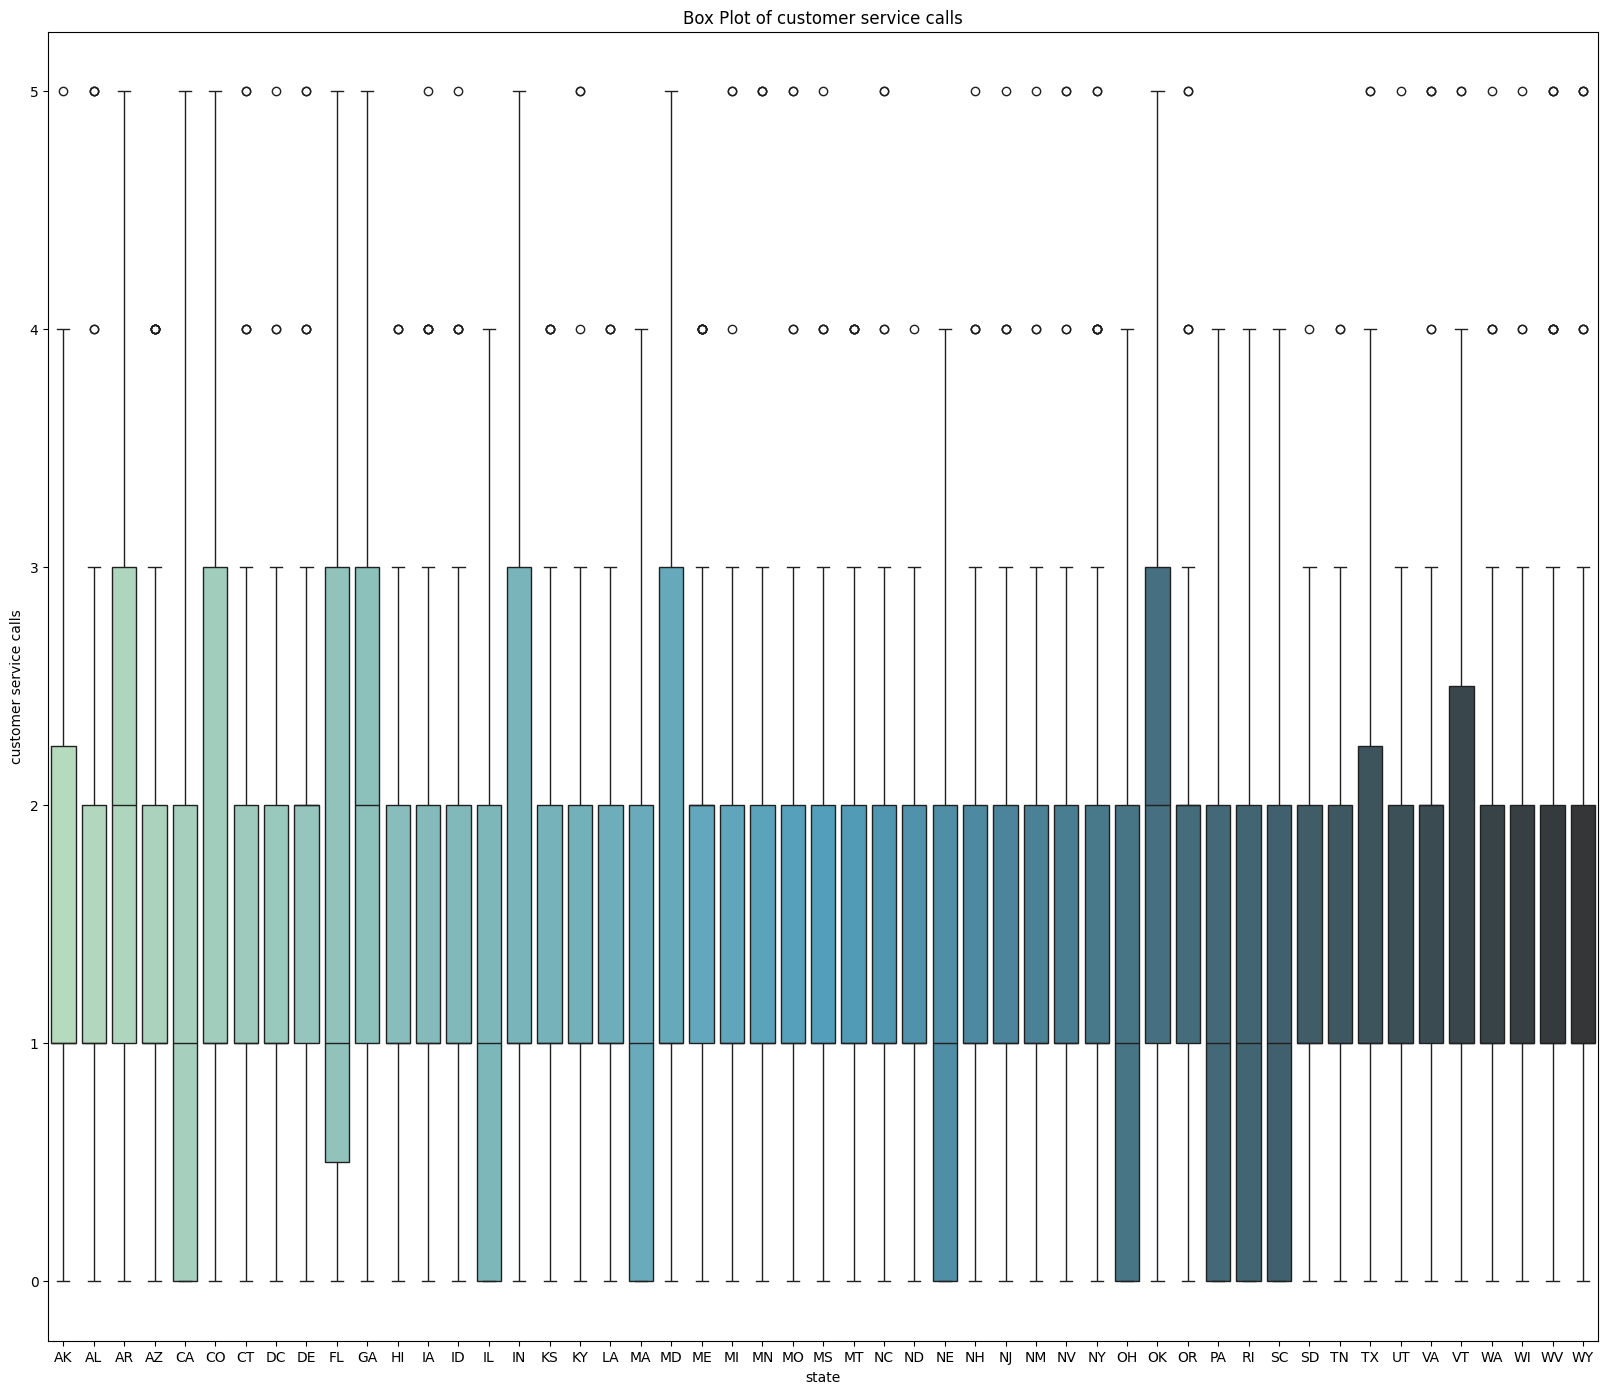

In [ ]:
#A visualization of the "customer service calls" without outliers using the box plots
# Creating a box plot
plt.figure(figsize = (20,17))
sns.boxplot(x='state', y='customer service calls', data=syriaTel_nooutliers2, palette='GnBu_d').set_title('Box Plot of customer service calls')
plt.show()

###Conclusion on the Customer Service Calls outliers

Based on Customer service calls outliers(35), it shows the customers who made the most calls to customer service. Out of the 35 customers calls 22 churned and 13 did not. From the relationship established, dropping the outliers does not significatly alter the outlook of the data(model). However It would be important to retain these outliers since it give insights on the customer satisfaction and the quality of customer service .

##Multicollinearity

In [ ]:
#Create a new column(digit) to get the customer count
# Create a new column 'digit' and assign the value 1 to each row
syriaTel_customer = syriaTel_customer.assign(digit=1)

# Display the DataFrame with the new column
syriaTel_customer


,state,Subscription Period,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,digit
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,1
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,1
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,1
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,1


                  Feature       VIF
0     Subscription Period  5.048991
1  customer service calls  2.224197
2        total day charge  5.341233


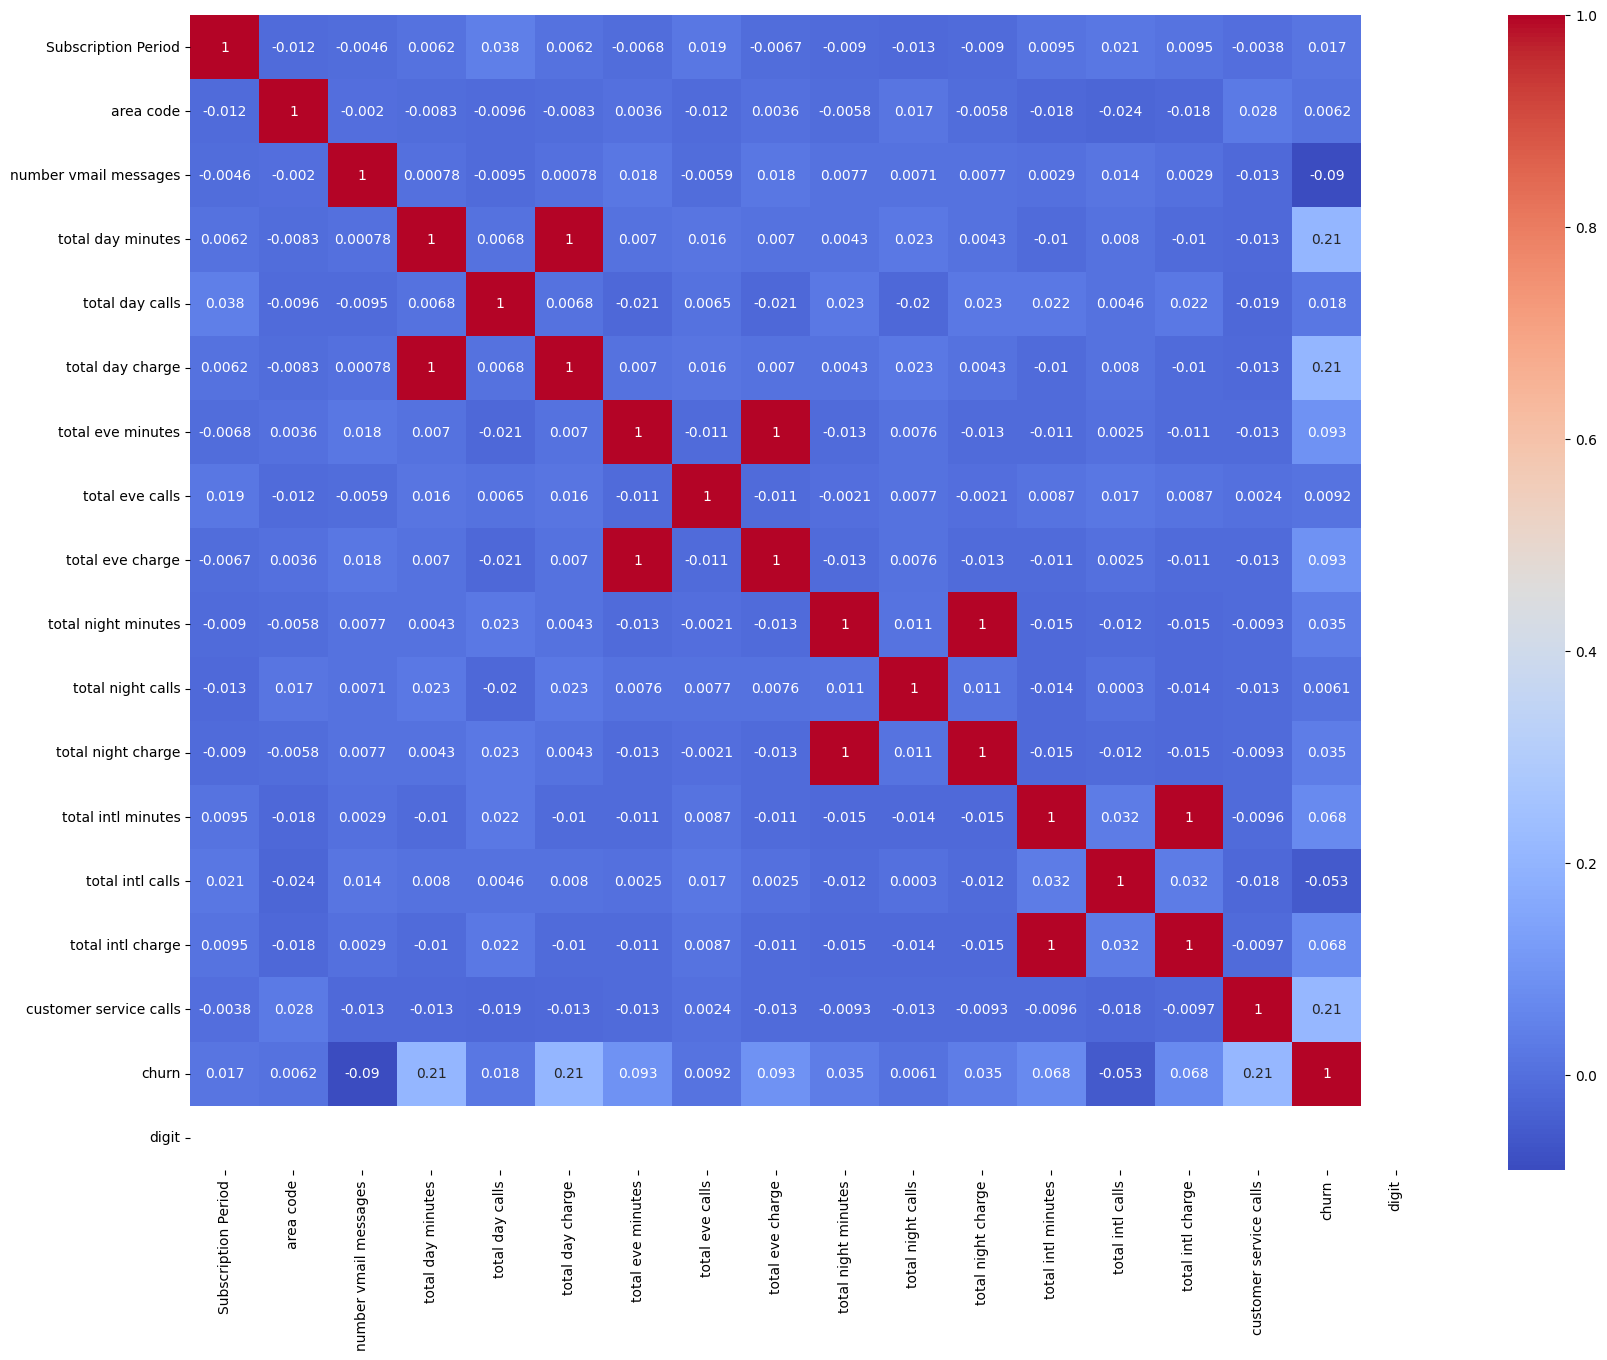

In [ ]:
#To check for multicollinearity on the data
#Calculate the correlation using the correlation matrix
correlation_matrix = syriaTel_customer.corr()

# Visualize correlation matrix
plt.figure(figsize=(20, 15))
syriaTel_customer = pd.get_dummies(syriaTel_customer, columns=['digit'], drop_first=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Check Variance Inflation Factor (VIF)
X = syriaTel_customer[['Subscription Period', 'customer service calls', 'total day charge']]  # to Specify independent variables
vif_syriaTel_customer = pd.DataFrame()
vif_syriaTel_customer['Feature'] = X.columns
vif_syriaTel_customer['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


print(vif_syriaTel_customer)


In [ ]:
#To create a total charge column and do the correlation heat map
syriaTel_customer['total charge'] = syriaTel_customer[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
syriaTel_customer

,state,Subscription Period,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,57.53


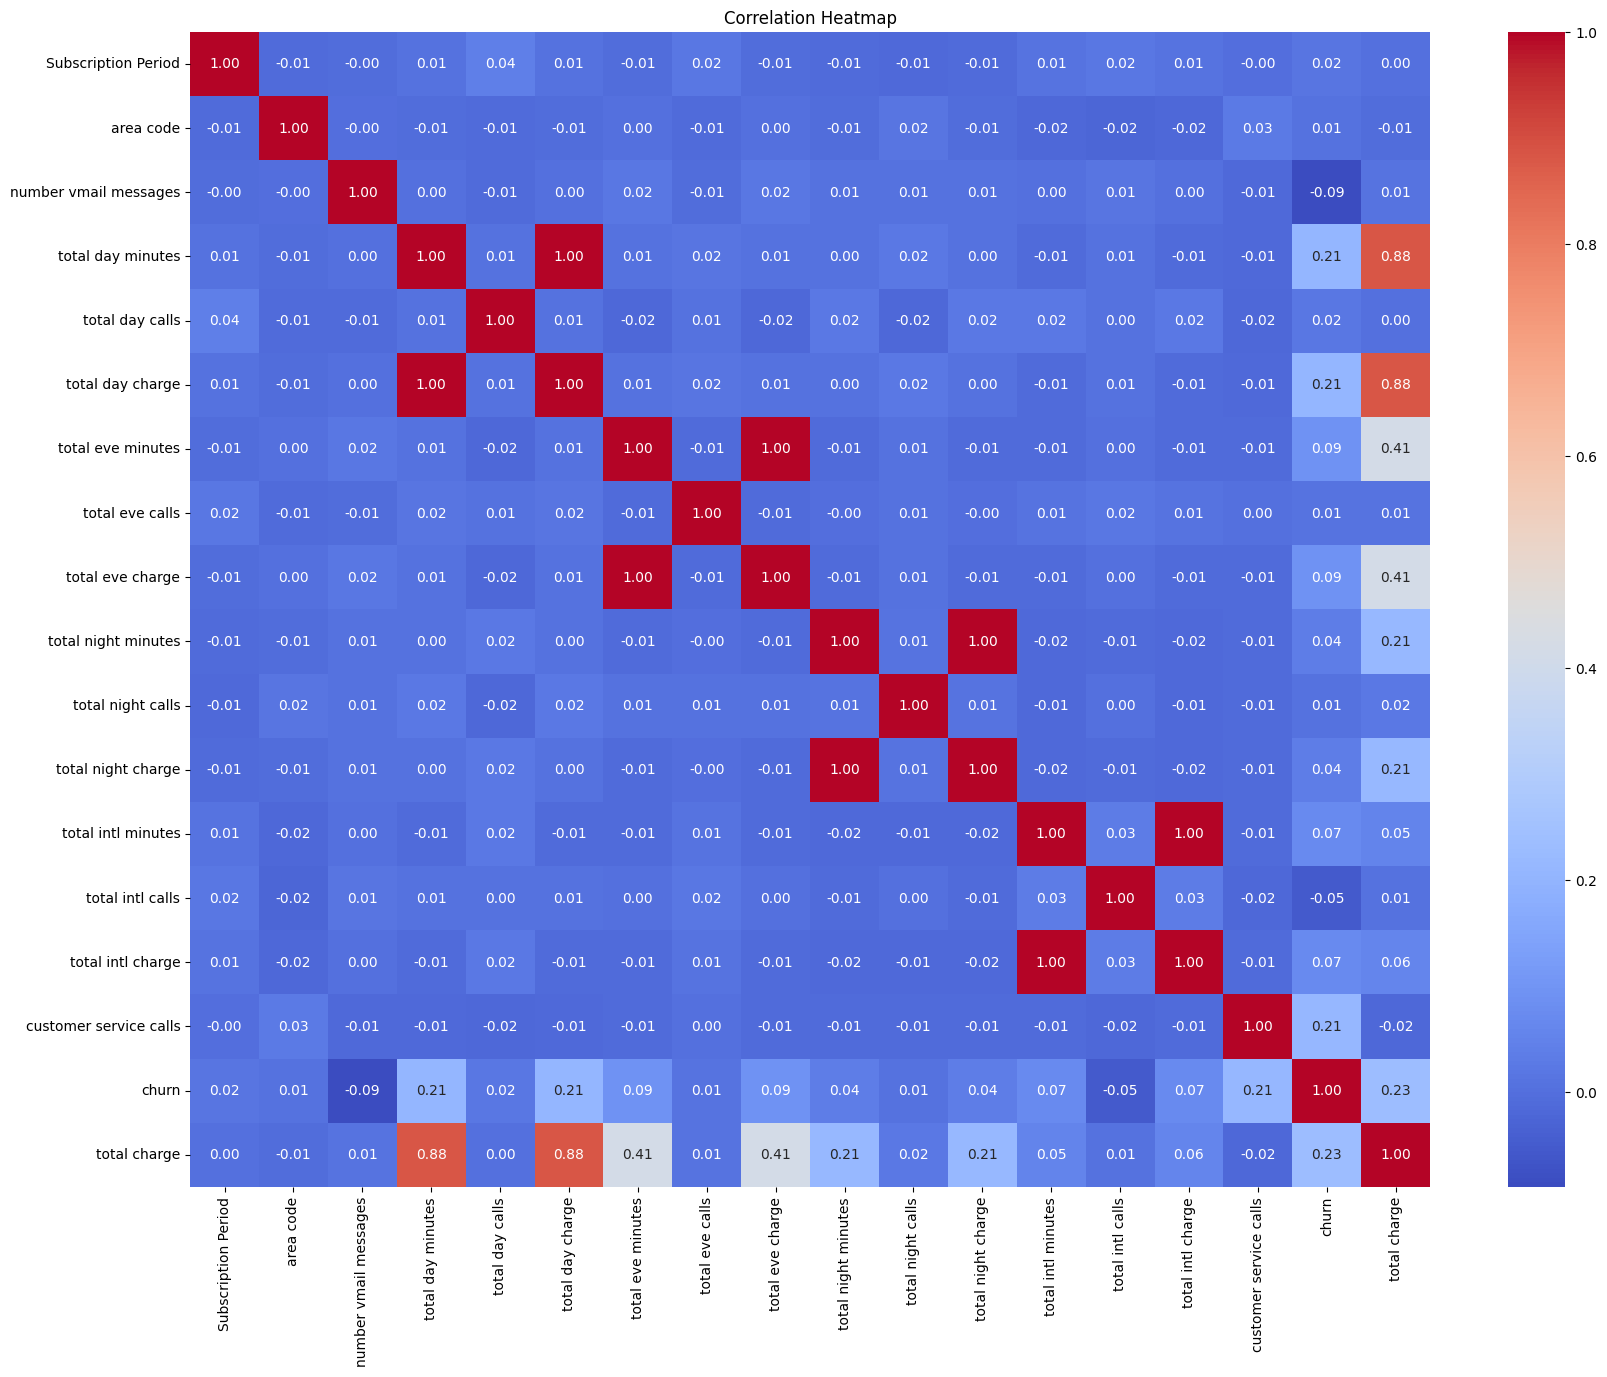

In [ ]:
#To check for multicollinearity on the data
#Calculate the correlation using the correlation matrix before dropping the charge's columns
correlation_matrix = syriaTel_customer.corr()
# Visualize correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#We drop the charge columns and check for multicollinearity
syriaTel_customer.drop(columns=['total day charge','total eve charge','total night charge','total intl charge'], inplace=True)

In [ ]:
syriaTel_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   Subscription Period     3333 non-null   int64   
 2   area code               3333 non-null   int64   
 3   phone number            3333 non-null   object  
 4   international plan      3333 non-null   category
 5   voice mail plan         3333 non-null   category
 6   number vmail messages   3333 non-null   int64   
 7   total day minutes       3333 non-null   float64 
 8   total day calls         3333 non-null   int64   
 9   total eve minutes       3333 non-null   float64 
 10  total eve calls         3333 non-null   int64   
 11  total night minutes     3333 non-null   float64 
 12  total night calls       3333 non-null   int64   
 13  total intl minutes      3333 non-null   float64 
 14  total intl calls        

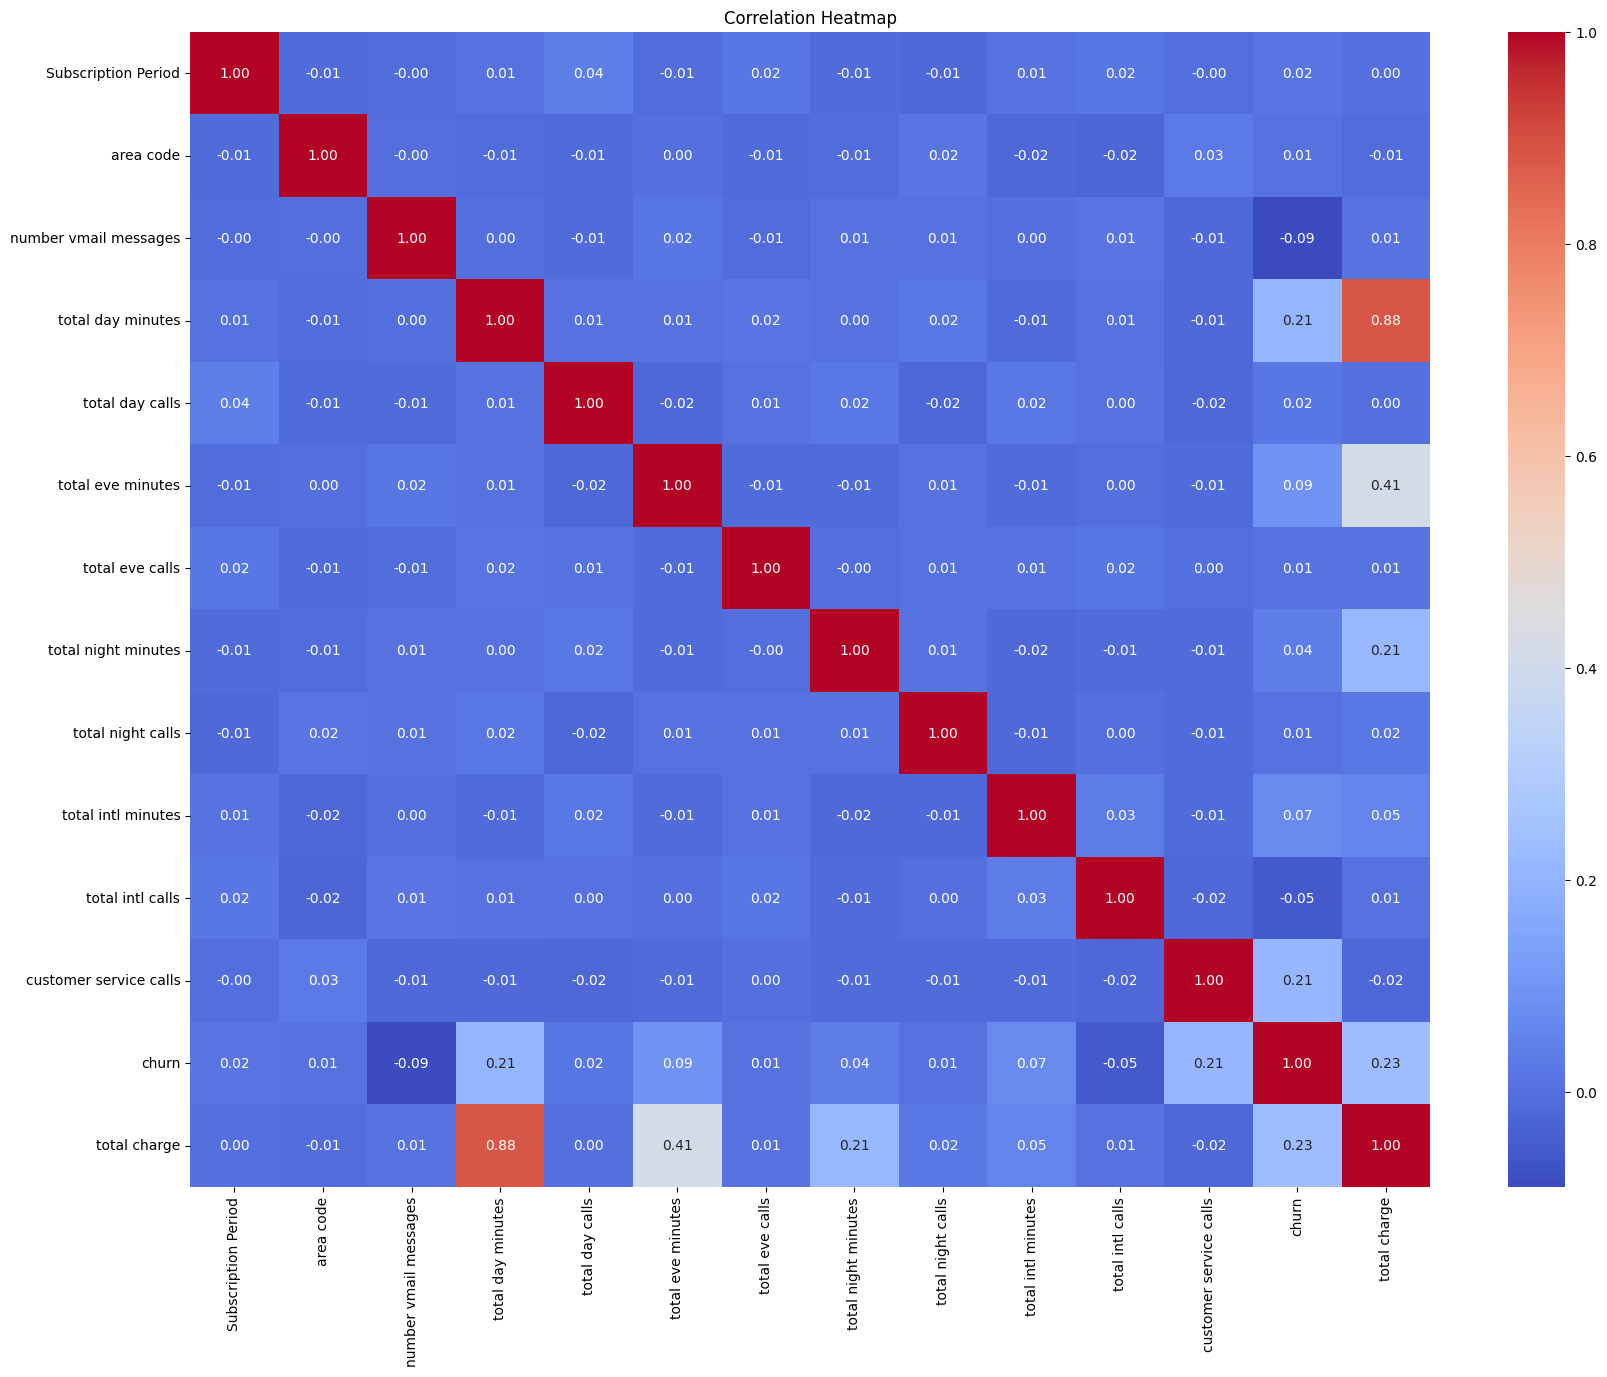

In [ ]:
#To check for multicllinearity on the data
#Calculate the correlation using the correlation matrix before dropping the charge's columns
correlation_matrix = syriaTel_customer.corr()
# Visualize correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##Creating Features

In [ ]:
#On a further look at the data, we see that, since we have the states , the area code column will not be very useful in our analysis
#Drop area code column
syriaTel_customer.drop(columns=['area code'], inplace=True)

In [ ]:
#to better understand, we organise the data statewise
#To calculate number of customers per state
#syriaTel_state = syriaTel_customer.groupby('state').size()
customer_counts = syriaTel_customer.groupby('state').size()
print("Number of customers per state:")
print(customer_counts)


Number of customers per state:
state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64


In [ ]:
data_type = type(syriaTel_customer['international plan'])
print("Data type of 'international plan' column:", data_type)

Data type of 'international plan' column: <class 'pandas.core.series.Series'>


In [ ]:
#Arrange dataframe per state
#Convert the columns datatype from category to integer
# Iterate over columns and convert categorical columns to category codes
columns_to_aggregate = [col for col in syriaTel_customer.columns if col != 'state']

for col in columns_to_aggregate:
    if syriaTel_customer[col].dtype == 'category':
        syriaTel_customer[col] = syriaTel_customer[col].cat.codes.astype(np.int8)

# Get the data type of the 'international plan' column
column_dtype = syriaTel_customer['international plan'].dtype
print("Data type of column 'international plan' after conversion:", column_dtype)


Data type of column 'international plan' after conversion: int8


In [ ]:
#Create a new column(digit) to get the customer count
# Create a new column 'digit' and assign the value 1 to each row
syriaTel_customer = syriaTel_customer.assign(digit=1)

# Display the DataFrame with the new column
syriaTel_customer


,state,Subscription Period,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total charge,digit
0,KS,128,382-4657,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,75.56,1
1,OH,107,371-7191,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,59.24,1
2,NJ,137,358-1921,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,62.29,1
3,OH,84,375-9999,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,66.80,1
4,OK,75,330-6626,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,52.09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,414-4276,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False,60.10,1
3329,WV,68,370-3271,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False,63.53,1
3330,RI,28,328-8230,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False,67.74,1
3331,CT,184,364-6381,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False,57.53,1


In [ ]:
#specify columns to aggegate
columns_to_aggregate = [col for col in syriaTel_customer.columns if col != 'state']

# Assign a constant value of 1 to a new column named 'digit'
syriaTel_customer['digit'] = 1

# Group the data by state and sum the values of multiple columns
statewise_data = syriaTel_customer.groupby('state')[columns_to_aggregate].sum().reset_index()
statewise_data.head()


,state,Subscription Period,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total charge,digit
0,AK,5054,4,16,471,9276.0,4954,9582.7,5022,10001.0,5062,521.0,250,81,3,2982.21,52
1,AL,7842,8,21,574,14880.8,7928,15637.0,7877,14982.8,7889,823.4,376,125,8,4755.43,80
2,AR,5334,8,14,396,9686.4,5618,11057.6,5381,11300.0,5448,570.5,258,109,11,3249.19,55
3,AZ,6430,3,19,606,10982.7,6407,12015.9,6554,12416.3,6399,680.4,311,102,4,3630.93,64
4,CA,3374,4,11,306,6241.2,3553,6765.0,3505,6749.3,3373,335.5,151,50,9,2030.42,34


In [ ]:
statewise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   51 non-null     category
 1   Subscription Period     51 non-null     int64   
 2   international plan      51 non-null     int8    
 3   voice mail plan         51 non-null     int8    
 4   number vmail messages   51 non-null     int64   
 5   total day minutes       51 non-null     float64 
 6   total day calls         51 non-null     int64   
 7   total eve minutes       51 non-null     float64 
 8   total eve calls         51 non-null     int64   
 9   total night minutes     51 non-null     float64 
 10  total night calls       51 non-null     int64   
 11  total intl minutes      51 non-null     float64 
 12  total intl calls        51 non-null     int64   
 13  customer service calls  51 non-null     int64   
 14  churn                   51 n

In [ ]:
#Insert columns of customer percentage by state and by churn
# Calculate the total number of customers
total_customers = statewise_data['digit'].sum()
print("total_customers:", total_customers)

# Calculate the percentage of customers for each state
statewise_data['percentage_of_customers'] = (statewise_data['digit'] / total_customers) * 100

statewise_data.head()


total_customers: 3333


,state,Subscription Period,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total charge,digit,percentage_of_customers
0,AK,5054,4,16,471,9276.0,4954,9582.7,5022,10001.0,5062,521.0,250,81,3,2982.21,52,1.560156
1,AL,7842,8,21,574,14880.8,7928,15637.0,7877,14982.8,7889,823.4,376,125,8,4755.43,80,2.400240
2,AR,5334,8,14,396,9686.4,5618,11057.6,5381,11300.0,5448,570.5,258,109,11,3249.19,55,1.650165
3,AZ,6430,3,19,606,10982.7,6407,12015.9,6554,12416.3,6399,680.4,311,102,4,3630.93,64,1.920192
4,CA,3374,4,11,306,6241.2,3553,6765.0,3505,6749.3,3373,335.5,151,50,9,2030.42,34,1.020102


In [ ]:
#Percentage of churns per state
statewise_data['churn_percentage'] = (statewise_data['churn']/total_customers) * 100
statewise_data.head()


,state,Subscription Period,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total charge,digit,percentage_of_customers,churn_percentage
0,AK,5054,4,16,471,9276.0,4954,9582.7,5022,10001.0,5062,521.0,250,81,3,2982.21,52,1.560156,0.090009
1,AL,7842,8,21,574,14880.8,7928,15637.0,7877,14982.8,7889,823.4,376,125,8,4755.43,80,2.400240,0.240024
2,AR,5334,8,14,396,9686.4,5618,11057.6,5381,11300.0,5448,570.5,258,109,11,3249.19,55,1.650165,0.330033
3,AZ,6430,3,19,606,10982.7,6407,12015.9,6554,12416.3,6399,680.4,311,102,4,3630.93,64,1.920192,0.120012
4,CA,3374,4,11,306,6241.2,3553,6765.0,3505,6749.3,3373,335.5,151,50,9,2030.42,34,1.020102,0.270027


In [ ]:
statewise_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Subscription Period,51.0,6604.882353,1198.811839,3374.000000,5825.500000,6604.000000,7349.000000,10116.000000
international plan,51.0,6.333333,2.854237,0.000000,4.000000,6.000000,8.000000,15.000000
voice mail plan,51.0,18.078431,4.014191,10.000000,15.500000,18.000000,20.000000,29.000000
number vmail messages,51.0,529.294118,122.386812,301.000000,456.000000,522.000000,613.000000,925.000000
total day minutes,51.0,11748.831373,2186.280268,6241.200000,10159.900000,11615.000000,13315.800000,18438.800000
total day calls,51.0,6563.764706,1202.514875,3553.000000,5909.000000,6475.000000,7304.000000,11001.000000
total eve minutes,51.0,13134.656863,2342.630081,6765.000000,11676.250000,13392.400000,14383.200000,19971.800000
total eve calls,51.0,6542.764706,1166.372901,3505.000000,5882.500000,6485.000000,7217.000000,10394.000000
total night minutes,51.0,13127.578431,2441.684781,6749.300000,11705.600000,13176.200000,14533.700000,21311.900000
total night calls,51.0,6542.333333,1221.903379,3373.000000,5877.500000,6406.000000,7292.000000,10660.000000


Some insights of the statewise data

##Statistical Summaries

Interpretation of the summary

In [ ]:
syriaTel_customer.describe()

,Subscription Period,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total charge,digit
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,59.449754,1.0
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,10.502261,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,22.930000,1.0
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,52.380000,1.0
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,59.470000,1.0
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,66.480000,1.0
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,96.150000,1.0


##Univariate Analysis
* Target Variable

**'Churn'** is our target as that is the dependent variable we are trying to predict.

In [ ]:
#Convert the churn column data type to integer
syriaTel_customer['churn'] = syriaTel_customer['churn'].astype(int)
count_false = sum(syriaTel_customer['churn'] == 0)
count_false

2850

In [ ]:
syriaTel_customer.head()

,state,Subscription Period,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total charge,digit
0,KS,128,382-4657,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56,1
1,OH,107,371-7191,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24,1
2,NJ,137,358-1921,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29,1
3,OH,84,375-9999,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80,1
4,OK,75,330-6626,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09,1


<Figure size 2000x1500 with 0 Axes>

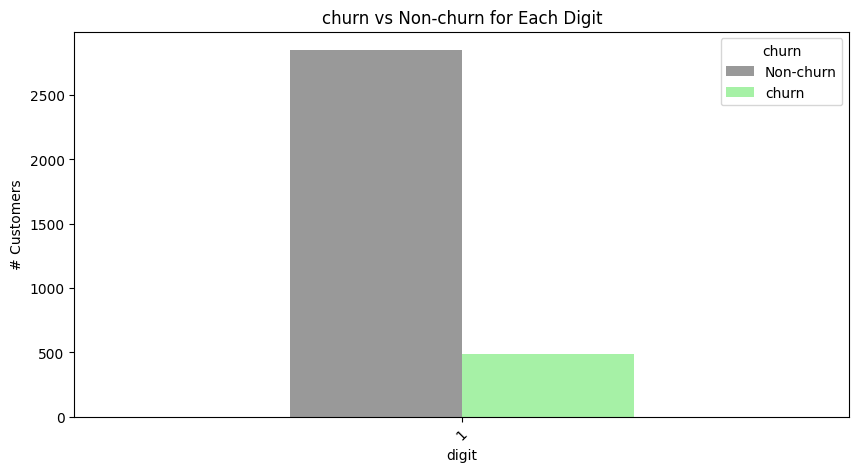

Churn percentage: 14.491449144914492
Non-churn percentage: 85.5085508550855


In [ ]:
# Group by 'digit' and 'churn' and count occurrences
grouped_data = syriaTel_customer.groupby(['digit', 'churn']).size().unstack()

plt.figure(figsize=(20, 15))
grouped_data.plot(kind='bar', alpha=0.8, color=['grey', 'lightgreen'], width=0.4)


plt.title('churn vs Non-churn for Each Digit')
plt.xlabel('digit')
plt.ylabel('# Customers')
plt.legend(title='churn', labels=['Non-churn', 'churn'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Calculate total counts
total_counts = len(syriaTel_customer)

# Calculate churn and non-churn counts
churn_count = syriaTel_customer['churn'].sum()
non_churn_count = total_counts - churn_count

# Calculate churn and non-churn percentages
churn_percentage = (churn_count / total_counts) * 100
non_churn_percentage = (non_churn_count / total_counts) * 100

print("Churn percentage:", churn_percentage)
print("Non-churn percentage:", non_churn_percentage)


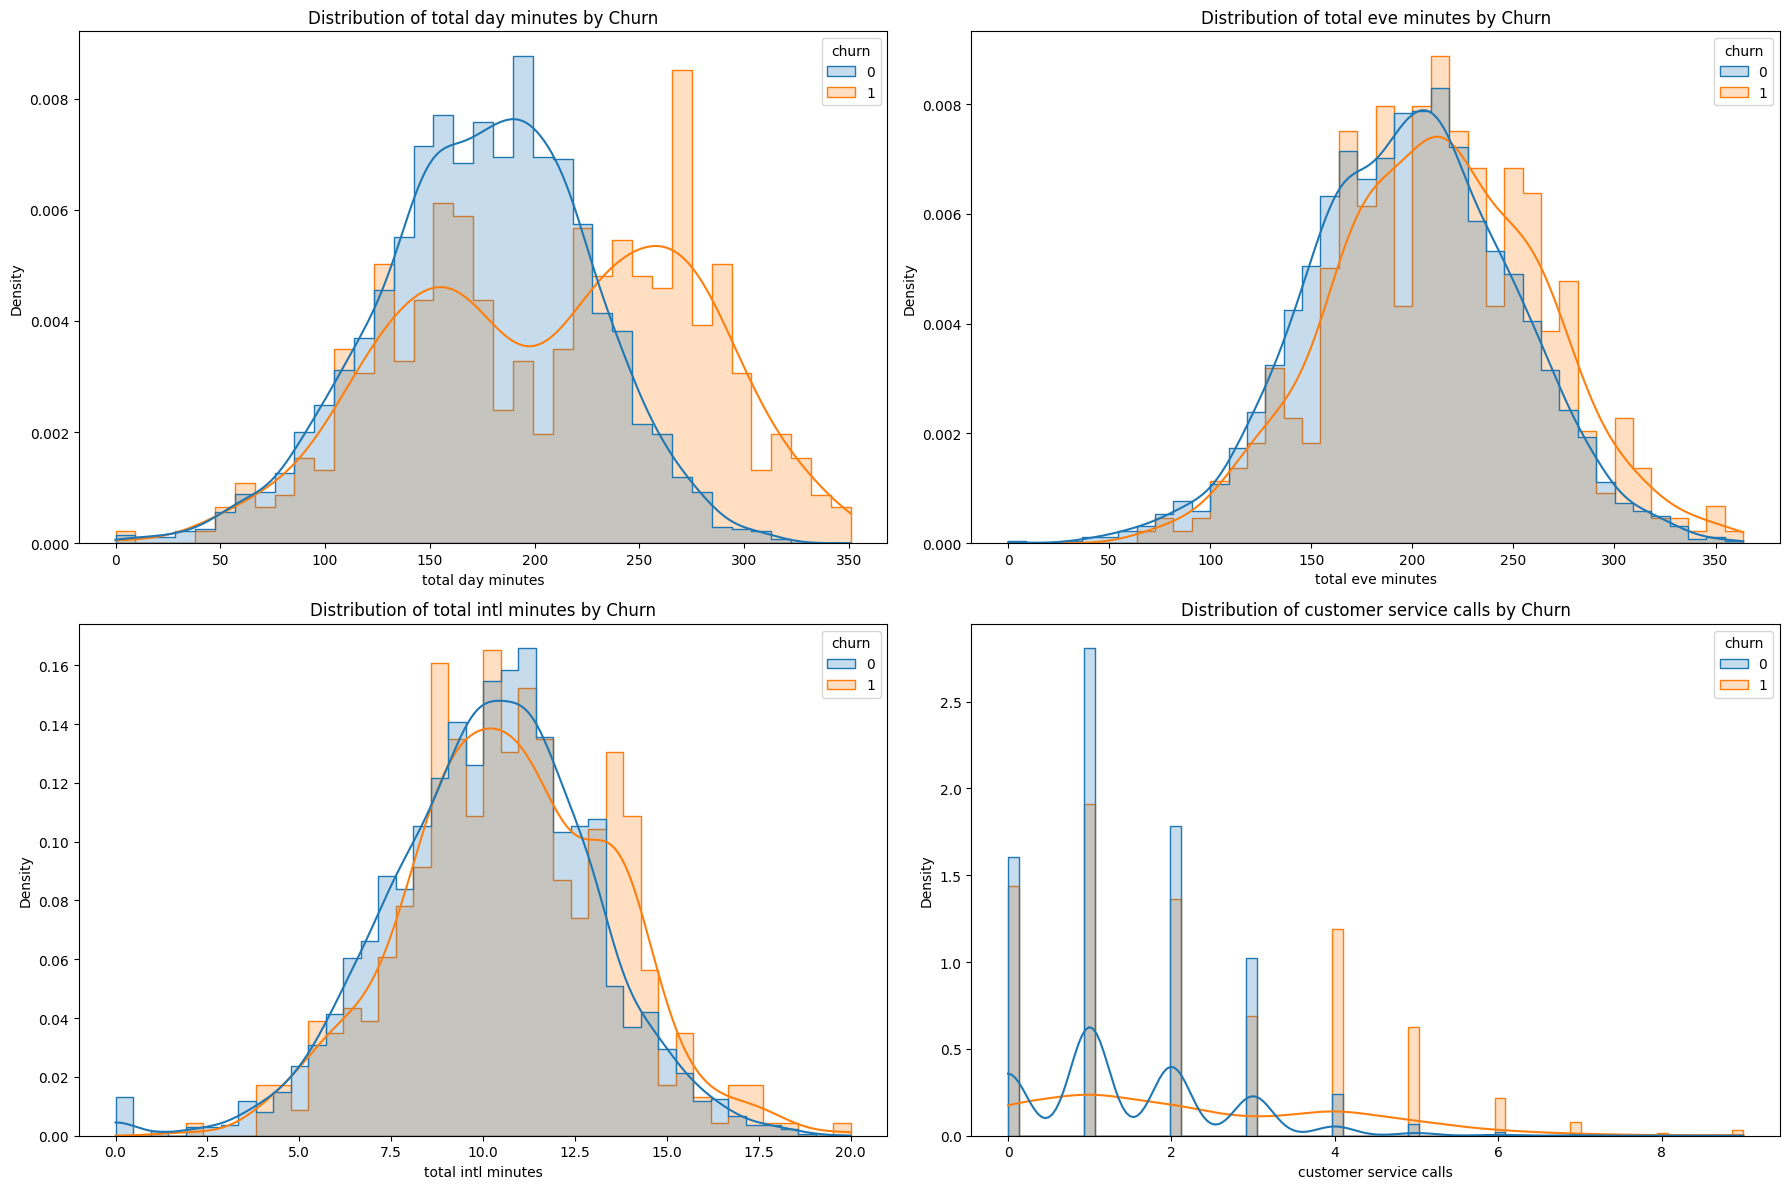

In [ ]:
# Selected features for univariate analysis
features = ['total day minutes', 'total eve minutes', 'total intl minutes', 'customer service calls']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=feature, hue='churn', data=syriaTel_customer, kde=True, palette="tab10", element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

The univariate analysis of selected features reveals distinct patterns in relation to customer churn:

1. **Total Day Minutes:** Customers who churn tend to use significantly more day minutes compared to those who do not churn. This suggests a potential pain point or dissatisfaction related to daytime usage or charges.
2. **Total Eve Minutes:** While there's some overlap, churned customers also show a tendency towards higher evening minutes usage. However, the distinction is not as pronounced as with day minutes.
3. **Total Intl Minutes:** International minutes usage shows less clear differentiation between churned and retained customers, though there's a slight indication that higher international usage could correlate with churn.
4. **Customer Service Calls:** There's a noticeable trend where customers who make more service calls are more likely to churn. This is a strong indicator that the number of customer service calls may be directly related to customer dissatisfaction and churn.


Insights from Univariate Analysis:
* **Daytime and evening usage:** High usage might be causing higher bills or dissatisfaction due to service quality during these periods, contributing to churn.
* **Customer service interactions:** A higher number of service calls is a clear indicator of potential issues or dissatisfaction leading to churn. This feature will be crucial for predicting churn.

In [ ]:
print(syriaTel_customer.columns)

Index(['state', 'Subscription Period', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn', 'total charge',
       'digit'],
      dtype='object')


Target variable insights :

Number of customers churned is 485 and the number of non churned customers 2850

Numeric Features

- Subscription Period
- Number of voice Mail messages
- Total day Minutes
- Total day Calls
- Total evening minutes
- Total evening calls
- Total Night minutes
- Total Night calls
- Total International calls
- Total International minutes
- Customer Service calls

Categorical features

- International Plan
- Voice Mail Plan

In [ ]:
# numeric features
#A summary of some of the numeric features and categorical features
print('Continuous Variables')
print(syriaTel_customer[['Subscription Period','customer service calls','total day calls','total eve calls','total night calls',]].describe().transpose())
print('--'*40)
print('Discrete Variables')
#print(syriaTel_customer.groupby('international plan').international plan.count())
print(syriaTel_customer.groupby('international plan')['international plan'].count())
print(syriaTel_customer.groupby('voice mail plan')['voice mail plan'].count())

Continuous Variables
                         count        mean        std   min   25%    50%  \
Subscription Period     3333.0  101.064806  39.822106   1.0  74.0  101.0   
customer service calls  3333.0    1.562856   1.315491   0.0   1.0    1.0   
total day calls         3333.0  100.435644  20.069084   0.0  87.0  101.0   
total eve calls         3333.0  100.114311  19.922625   0.0  87.0  100.0   
total night calls       3333.0  100.107711  19.568609  33.0  87.0  100.0   

                          75%    max  
Subscription Period     127.0  243.0  
customer service calls    2.0    9.0  
total day calls         114.0  165.0  
total eve calls         114.0  170.0  
total night calls       113.0  175.0  
--------------------------------------------------------------------------------
Discrete Variables
international plan
0    3010
1     323
Name: international plan, dtype: int64
voice mail plan
0    2411
1     922
Name: voice mail plan, dtype: int64


Text(0.5, 1.0, 'International plan')

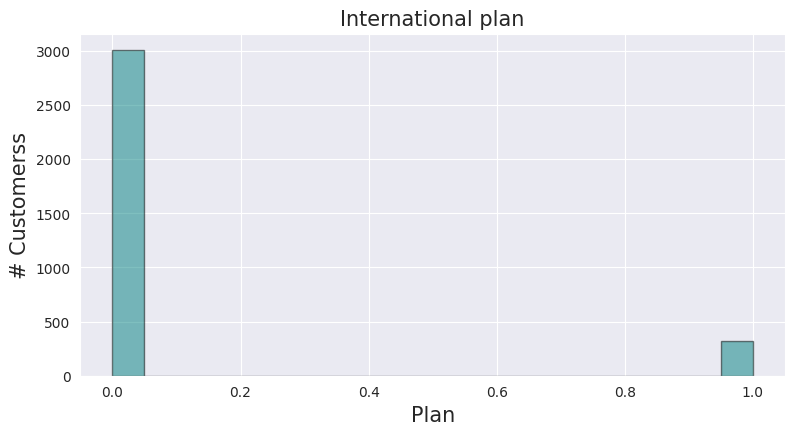

In [ ]:
#A visualization of some of the categorical variables
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax2 = fig.add_subplot(323)
ax2.hist(syriaTel_customer['international plan'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Plan',fontsize = 15)
ax2.set_ylabel('# Customerss',fontsize = 15)
ax2.set_title('International plan',fontsize = 15)

Text(0.5, 1.0, 'voice mail plan')

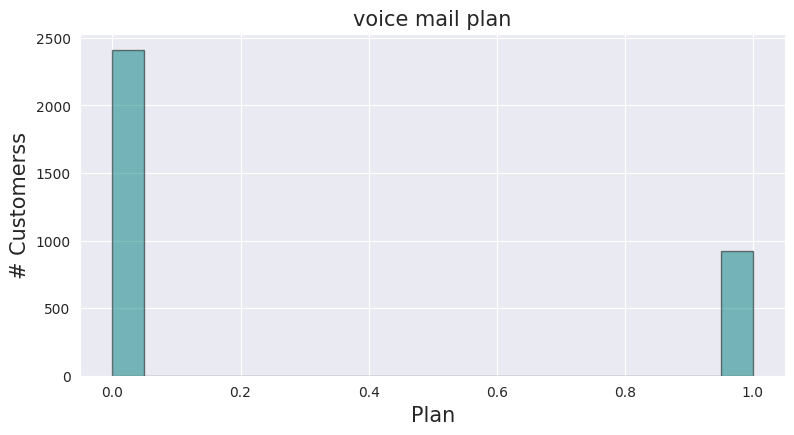

In [ ]:
#A visualization of the categorical features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax2 = fig.add_subplot(323)
ax2.hist(syriaTel_customer['voice mail plan'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Plan',fontsize = 15)
ax2.set_ylabel('# Customerss',fontsize = 15)
ax2.set_title('voice mail plan',fontsize = 15)

Target Vs Categorical features

In [ ]:
syriaTel_customer['churn'] = syriaTel_customer['churn'].astype(int)
count_false = sum(syriaTel_customer['churn'] == 1)
count_false


483

In [ ]:
count_false = sum(syriaTel_customer['international plan'] == 1)
count_false

323

In [ ]:
count_churned_international = sum((syriaTel_customer['international plan'] == 1) & (syriaTel_customer['churn'] == 1))
print("Number of customers with an international plan who churned:", count_churned_international)

Number of customers with an international plan who churned: 137


Number of customers with a voice mail plan who churned: 80
Number of customers with no voice mail plan who churned: 403
Number of customers with a voice mail plan who did not churned: 842
Number of customers with no voice mail plan who did not churn: 2008
Number of customers with an international plan who churned: 137
Number of customers with no international plan who churned: 346
Number of customers with no international plan who did  not churn: 2664
Number of customers with an international plan who did not churn: 186


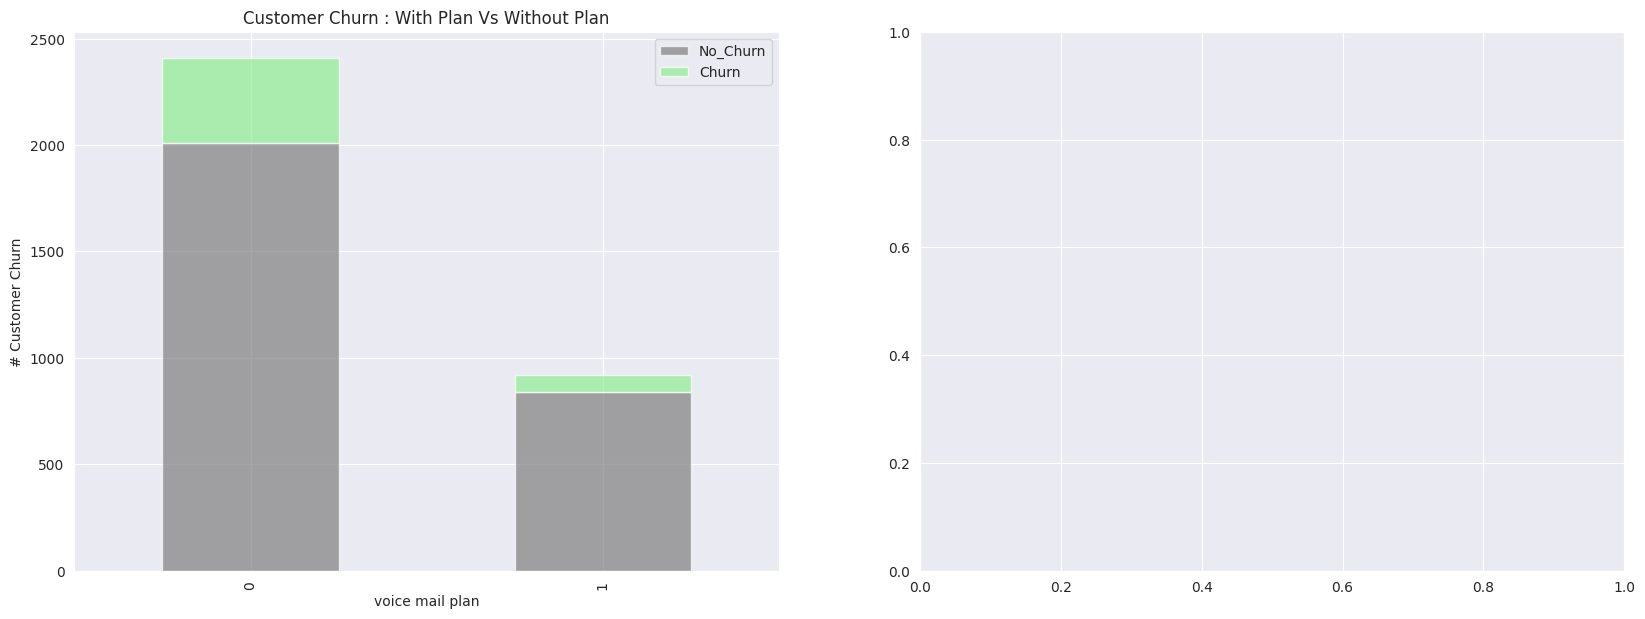

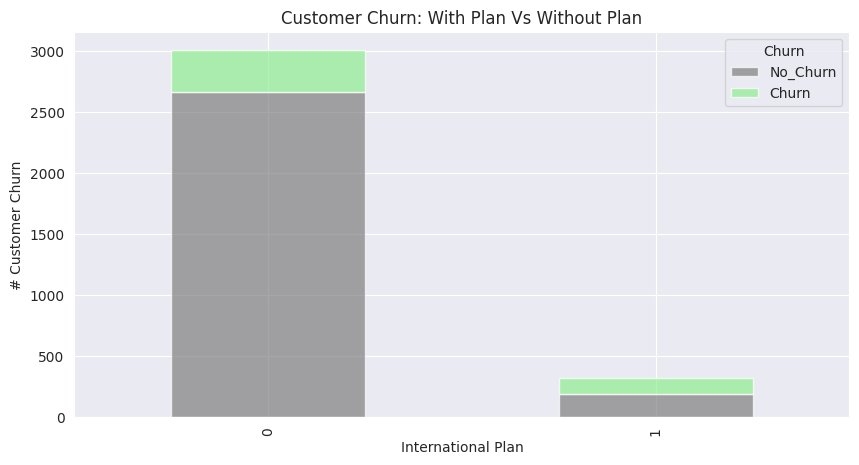

In [ ]:
# Sublots of categorical features v Churn

#get the count of customers with voice mail and churned
count_churned_voice = sum((syriaTel_customer['voice mail plan'] == 1) & (syriaTel_customer['churn'] == 1))
print("Number of customers with a voice mail plan who churned:", count_churned_voice)

count_churned_voice = sum((syriaTel_customer['voice mail plan'] == 0) & (syriaTel_customer['churn'] == 1))
print("Number of customers with no voice mail plan who churned:", count_churned_voice)

count_churned_voice = sum((syriaTel_customer['voice mail plan'] == 1) & (syriaTel_customer['churn'] == 0))
print("Number of customers with a voice mail plan who did not churned:", count_churned_voice)

count_churned_voice = sum((syriaTel_customer['voice mail plan'] == 0) & (syriaTel_customer['churn'] == 0))
print("Number of customers with no voice mail plan who did not churn:", count_churned_voice)

count_churned_international = sum((syriaTel_customer['international plan'] == 1) & (syriaTel_customer['churn'] == 1))
print("Number of customers with an international plan who churned:", count_churned_international)

count_churned_international = sum((syriaTel_customer['international plan'] == 0) & (syriaTel_customer['churn'] == 1))
print("Number of customers with no international plan who churned:", count_churned_international)

count_churned_international = sum((syriaTel_customer['international plan'] == 0) & (syriaTel_customer['churn'] == 0))
print("Number of customers with no international plan who did  not churn:", count_churned_international)

count_churned_international = sum((syriaTel_customer['international plan'] == 1) & (syriaTel_customer['churn'] == 0))
print("Number of customers with an international plan who did not churn:", count_churned_international)

sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

Voicemail_Plan = syriaTel_customer.groupby(['voice mail plan', 'churn'])['voice mail plan'].count().unstack()
p1 = Voicemail_Plan.plot(kind='bar', stacked=True,
                          title='Customer Churn : With Plan Vs Without Plan',
                          color=['grey', 'lightgreen'], alpha=0.7, ax=axes[0])
p1.set_xlabel('voice mail plan')
p1.set_ylabel('# Customer Churn')
p1.legend(['No_Churn', 'Churn'])


International_Plan = syriaTel_customer.groupby(['international plan', 'churn'])['international plan'].count().unstack()
p1 = International_Plan.plot(kind='bar', stacked=True,
                              title='Customer Churn: With Plan Vs Without Plan',
                              color=['grey', 'lightgreen'], alpha=0.7)
p1.set_xlabel('International Plan')
p1.set_ylabel('# Customer Churn')
p1.legend(['No_Churn', 'Churn'], title='Churn')



plt.show()


In [ ]:
#Correlation between Customers with international plan and churn

correlation = syriaTel_customer['international plan'].corr(syriaTel_customer['churn'])

print("Correlation between International Plan and churn:", correlation)

Correlation between International Plan and churn: 0.2598518473454828


Customers with an international plans are more likely to churn

In [ ]:
#Correlation between customer calls and churn

correlation = syriaTel_customer['customer service calls'].corr(syriaTel_customer['churn'])

print("Correlation between customer service calls and churn:", correlation)

Correlation between customer service calls and churn: 0.20874999878379402


A correlation coefficient of 0.20874999878379402 indicates a weak positive correlation between the variables 'customer service calls' and 'churn'.

Since the correlation coefficient is positive, it suggests that as the number of customer service calls increases, the likelihood of churn also tends to increase slightly.
However, the value of 0.208 is relatively small, indicating that the relationship between the variables is weak. This means that there may be other factors influencing churn besides the number of customer service calls.


#**Preprocessing Visualizations**

Preprocessing visualizations play a crucial role by providing insights into the relationships between different variables and the target variable (churn). They serve several purposes:

Understanding Data Distribution: Preprocessing visualizations help in understanding the distribution of data across different categories or variables. For example, visualizing the distribution of churned and non-churned customers across different states provides insights into whether there are any geographical patterns or disparities in churn rates.

Identifying Patterns and Trends: Visualizations help in identifying patterns and trends within the data. By plotting variables such as 'customer service calls' against churn, we can observe if there are any trends indicating higher churn rates associated with specific levels of customer service calls.

Feature Engineering: Visualizations aid in feature engineering by identifying potential features or combinations of features that may be predictive of churn. For instance, visualizing the relationship between 'customer calls' with 'international plan' and churn helps in understanding how the combination of these features influences churn.

Data Preprocessing Insights: Visualizations provide insights into potential preprocessing steps that may be required before building predictive models. For example, visualizing the distribution of 'customer service calls' across different states may reveal outliers or skewed distributions that need to be addressed through data preprocessing techniques like normalization or outlier removal.

Communicating Findings: Visualizations are an effective way to communicate findings and insights to stakeholders and decision-makers. They provide a clear and concise way to convey complex relationships and patterns within the data.

Overall, preprocessing visualizations play a critical role in exploring and understanding the data, identifying potential predictors of churn, and informing preprocessing steps to prepare the data for predictive modeling. They contribute to the overall goal of the proposal by providing actionable insights to reduce customer churn and improve customer retention strategies for SyriaTel.

##Churn Rate Overview

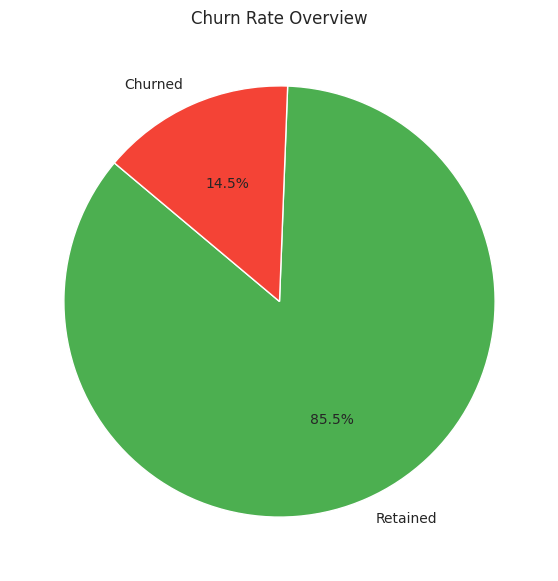

In [ ]:
# Churn Rate Overview
churn_rate_data = syriaTel_customer['churn'].value_counts(normalize=True).rename(index={0: 'Retained', 1: 'Churned'})
plt.figure(figsize=(7, 7))
plt.pie(churn_rate_data, labels=churn_rate_data.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Churn Rate Overview')
plt.show()

##Churn Rate by State

In [ ]:
# pip install plotly
state_churn_rates = syriaTel_customer.groupby('state')['churn'].mean().reset_index()
import plotly.express as px

fig = px.choropleth(state_churn_rates,
                    locations='state',
                    locationmode="USA-states",
                    color='churn',
                    color_continuous_scale="reds",
                    scope="usa",
                    title='Churn Rate by State')
fig.show()

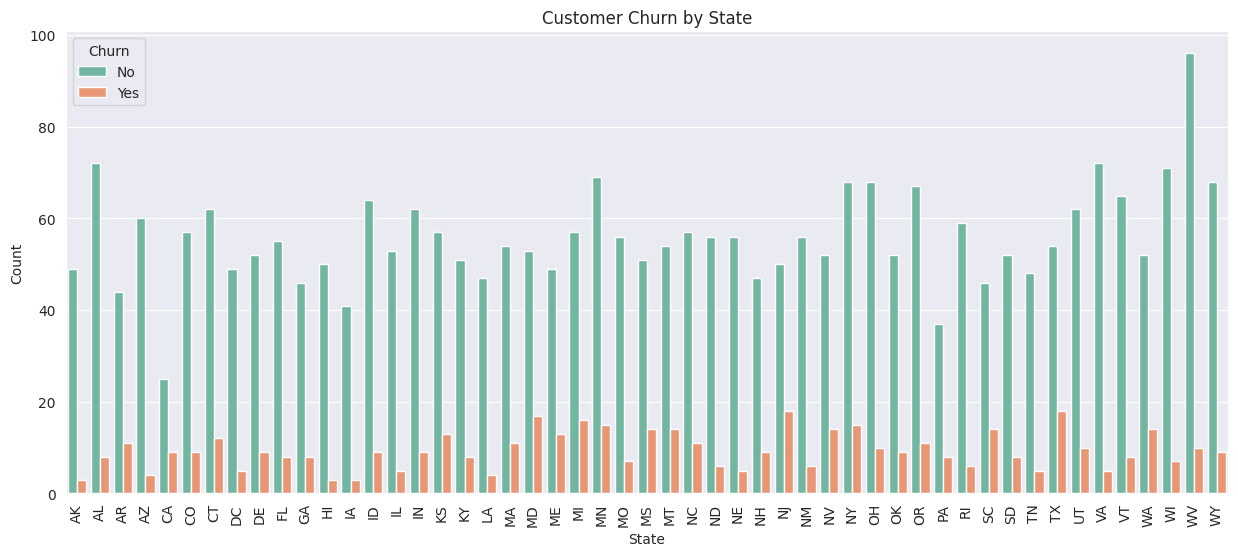

In [ ]:
# Plotting bar graph for states vs churn
plt.figure(figsize=(15, 6))
sns.countplot(x='state', hue='churn', data=syriaTel_customer, palette='Set2')
plt.title('Customer Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

The bar graph 'Customer Churn by State' shows the distribution of churned and non-churned customers across different states.

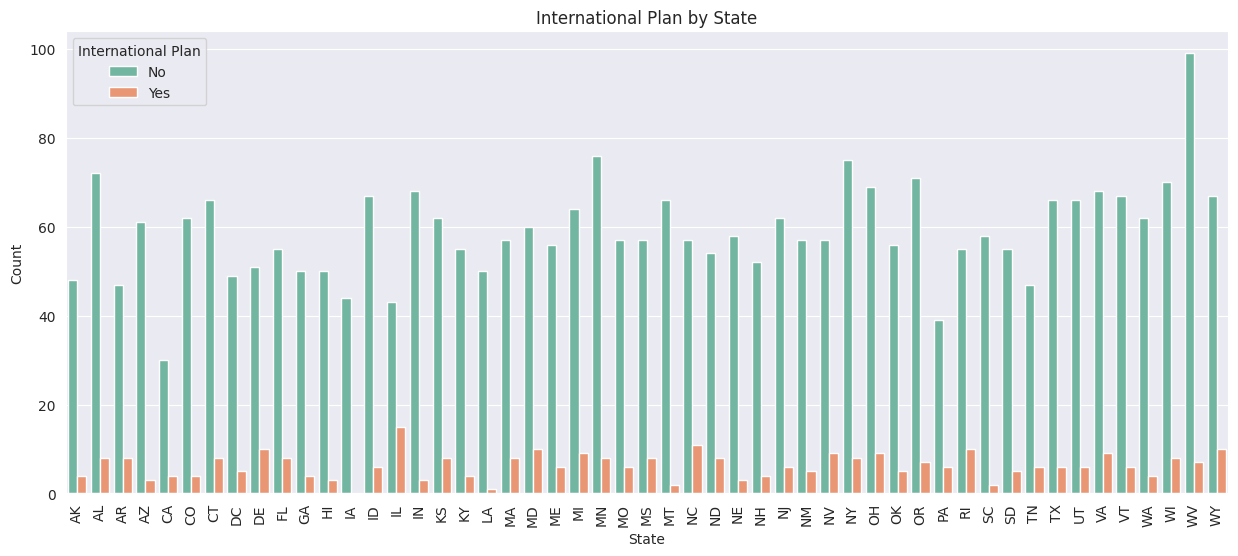

In [ ]:
# Plotting bar graph for states vs international plan
plt.figure(figsize=(15, 6))
sns.countplot(x='state', hue='international plan', data=syriaTel_customer, palette='Set2')
plt.title('International Plan by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='International Plan', labels=['No', 'Yes'])
plt.show()

The bar graph 'International Plan by State' visualizes the distribution of customers with and without an international plan across different states.

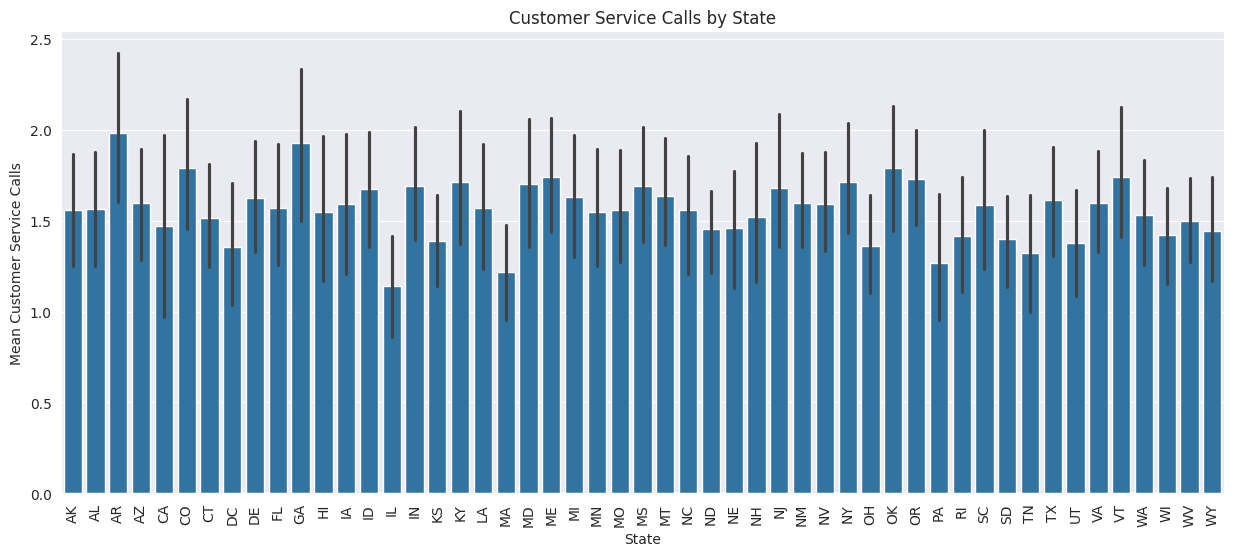

In [ ]:
# Plotting bar graph for states vs customer service calls
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='customer service calls', data=syriaTel_customer)
plt.title('Customer Service Calls by State')
plt.xlabel('State')
plt.ylabel('Mean Customer Service Calls')
plt.xticks(rotation=90)
plt.show()

The bar graph 'Customer Service Calls by State' displays the mean number of customer service calls made by customers in each state.

##Customer Service Calls by Churn

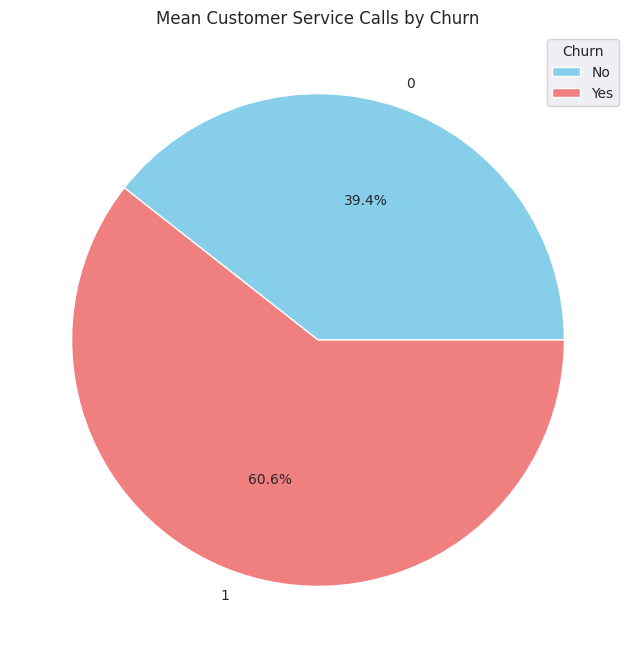

In [ ]:
# Plotting pie chart for customer calls vs churn
plt.figure(figsize=(8, 8))
syriaTel_customer.groupby('churn')['customer service calls'].mean().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Mean Customer Service Calls by Churn')
plt.ylabel('')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')
plt.show()

The pie chart 'Mean Customer Service Calls by Churn' illustrates the proportion of mean customer service calls made by churned and non-churned customers.

##Customer Service Calls with International Plan by Churn

<Figure size 800x800 with 0 Axes>

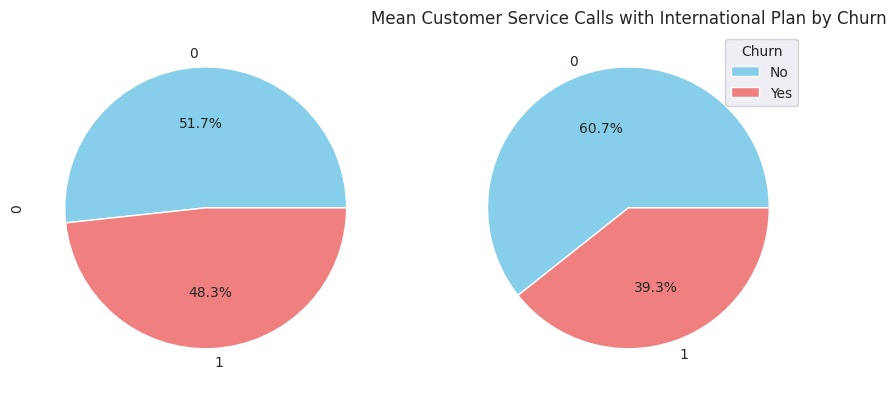

In [ ]:
# Plotting pie chart for customer calls with international plan vs churn
plt.figure(figsize=(8, 8))
syriaTel_customer.groupby(['international plan', 'churn'])['customer service calls'].mean().unstack().plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], legend=None)
plt.title('Mean Customer Service Calls with International Plan by Churn')
plt.ylabel('')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')
plt.show()

The pie chart 'Mean Customer Service Calls with International Plan by Churn' depicts the proportion of mean customer service calls made by churned and non-churned customers with an international plan.

**Explanation and Summary**:

These visualizations provide insights into the relationship between different variables and churn, allowing for a better understanding of customer behavior and potential predictors of churn in SyriaTel's customer base

# Segmentation and Clustering

Within the expansive scope of our churn analysis project, the Segmentation and Clustering analysis stands out as a critical endeavor aimed at dissecting Syriatel's customer base into meaningful segments. This analysis leverages advanced data analytics to group customers based on shared characteristics, behaviors, and service usage patterns. The objective is twofold: to uncover distinct customer segments that exhibit unique needs and preferences, and to utilize these insights for crafting personalized retention strategies.

By applying unsupervised learning techniques, notably K-means clustering, we process and analyze the customer data to identify homogeneous customer groups. This segmentation enables us to tailor our approach to customer engagement, ensuring that retention initiatives are both relevant and effective. The findings from this analysis are instrumental in driving strategic decisions, enabling Syriatel to enhance customer satisfaction, reduce churn, and foster loyalty in a competitive telecommunications landscape.

This concise overview encapsulates the essence of our segmentation and clustering efforts, highlighting their pivotal role in our comprehensive analysis aimed at understanding and mitigating customer churn.

In [ ]:
#Pre-check the dataset to start analysis
syriaTel_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   Subscription Period     3333 non-null   int64   
 2   phone number            3333 non-null   object  
 3   international plan      3333 non-null   int8    
 4   voice mail plan         3333 non-null   int8    
 5   number vmail messages   3333 non-null   int64   
 6   total day minutes       3333 non-null   float64 
 7   total day calls         3333 non-null   int64   
 8   total eve minutes       3333 non-null   float64 
 9   total eve calls         3333 non-null   int64   
 10  total night minutes     3333 non-null   float64 
 11  total night calls       3333 non-null   int64   
 12  total intl minutes      3333 non-null   float64 
 13  total intl calls        3333 non-null   int64   
 14  customer service calls  

Reviewing correlation and any multicolinearity issues, address them with feature selection.

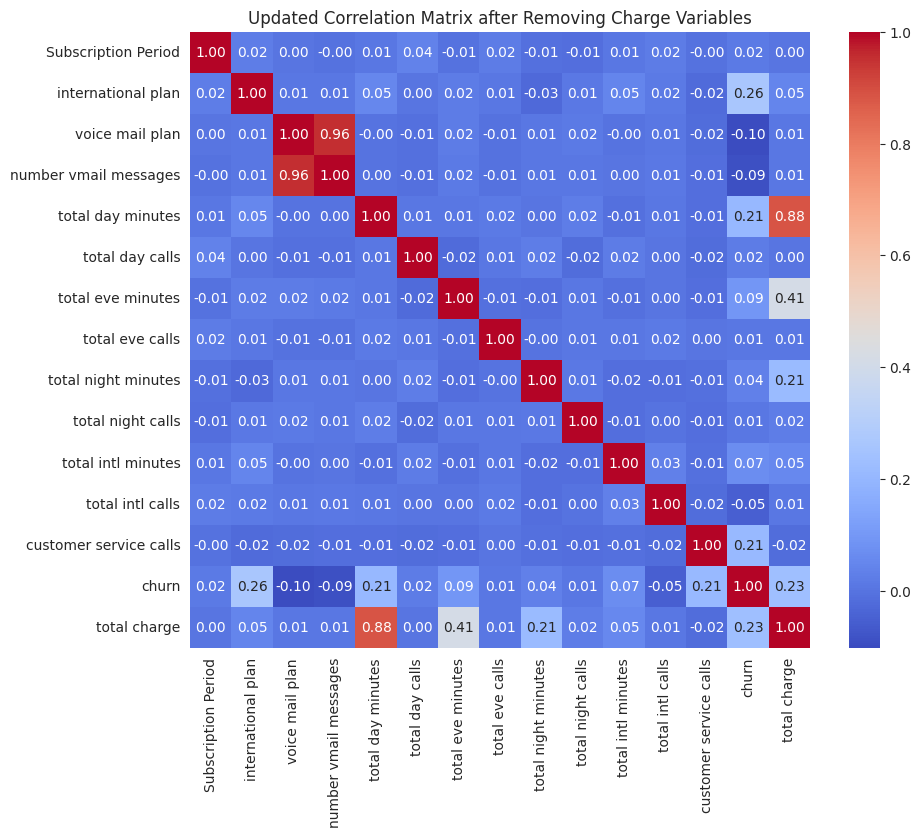

In [ ]:
# Remove charge variables
columns_to_remove = ['digit']
data_reduced = syriaTel_customer.drop(columns=columns_to_remove)

# Recalculate correlation matrix without charge variables
corr_matrix_reduced = data_reduced.corr()

# Plot heatmap of the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Updated Correlation Matrix after Removing Charge Variables")
plt.show()


**Key Observations:**\
**Reduced Multicollinearity:** The removal of charge variables has decreased the multicollinearity within the dataset, making it more suitable for modeling techniques sensitive to high correlations among independent variables.\
**Focus on Behavior:** Retaining minutes and calls provides a clearer focus on customer behavior through direct usage metrics rather than derived charges.

**Feature Engineering for Segmentation and Clustering Analysis**

**Total Usage:** Summarize the customer's total usage across all times of the day (day, eve, night) and international calls to capture overall activity.\
**Engagement Score:** Create an engagement score that combines various usage metrics (e.g., total minutes, total calls) to reflect how engaged a customer is with the service.\
**International Usage Indicator:** A feature indicating whether the customer uses more international minutes than the average, which could signal higher engagement or reliance on the service for international communication.


In [ ]:
# Calculate new features
data_reduced['total_usage_minutes'] = data_reduced[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
data_reduced['total_calls'] = data_reduced[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)
data_reduced['average_call_duration'] = data_reduced['total_usage_minutes'] / data_reduced['total_calls']

# International Usage Indicator
average_intl_minutes = data_reduced['total intl minutes'].mean()
data_reduced['high_intl_usage'] = data_reduced['total intl minutes'] > average_intl_minutes

# Display the first few rows to verify the new features
data_reduced[['total_usage_minutes', 'total_calls', 'average_call_duration', 'high_intl_usage']].head()


,total_usage_minutes,total_calls,average_call_duration,high_intl_usage
0,717.2,303,2.366997,False
1,625.2,332,1.883133,True
2,539.4,333,1.619820,True
3,564.8,255,2.214902,False
4,512.0,359,1.426184,False


**Selecting and Scaling Features**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features_for_clustering = ['total_usage_minutes', 'total_calls', 'customer service calls', 'international plan', 'high_intl_usage']
X = data_reduced[features_for_clustering]

# Convert boolean column to int for scaling
X['high_intl_usage'] = X['high_intl_usage'].astype(int)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the shape of the scaled features to confirm readiness for clustering
X_scaled.shape

(3333, 5)

**Features selected for Clustering**


**Total Usage Minutes:** Reflects overall usage.\
**Total Calls:** Indicates overall engagement in terms of call frequency.\
**Customer Service Calls:** Might indicate customer satisfaction or issues.\
**International Plan:** Shows whether the customer has a need for international communication services.\
**High International Usage:** Indicates higher than average international usage.

##**Determining the Optimal Number of Clusters**

Using the Elbow Method to determine the most appropriate number of clusters for K-means. This involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow point," where the rate of decrease sharply changes. This point is often considered a good trade-off between the number of clusters and the within-cluster variance.

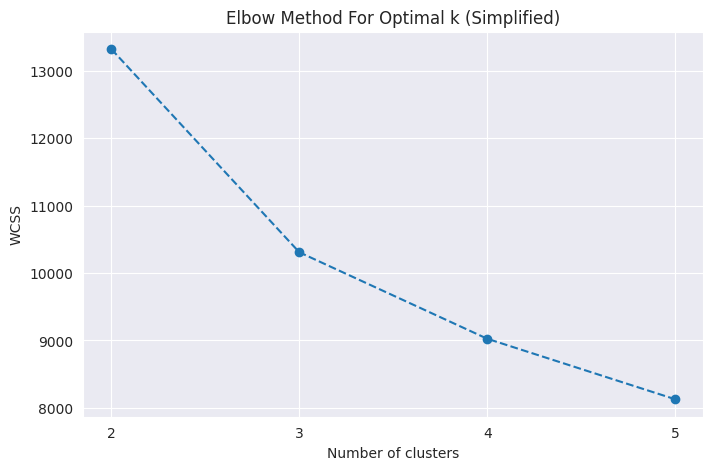

In [ ]:
import numpy as np

# Simplified range for WCSS calculation to reduce computation time
wcss_simplified = []
range_clusters = range(2, 6)  # Testing a smaller range of clusters from 2 to 5
for i in range_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss_simplified.append(kmeans.inertia_)

# Plot the simplified Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss_simplified, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k (Simplified)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(min(range_clusters), max(range_clusters)+1, 1))
plt.grid(True)
plt.show()



In [ ]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Assign the cluster labels to the dataset
data_reduced['cluster'] = kmeans.labels_

# Check the distribution of customers across the clusters
cluster_distribution = data_reduced['cluster'].value_counts(normalize=True) * 100

# Display the distribution
cluster_distribution


1    35.853585
2    35.553555
3    18.931893
0     9.660966
Name: cluster, dtype: float64

Distribution of customers across the clusters:

**Cluster 1:** Represents approximately 35.85% of customers.\
**Cluster 2:** Comprises around 35.55% of customers.\
**Cluster 3:** Accounts for about 18.93% of customers.\
**Cluster 0:** The smallest group, containing 9.66% of customers.

## **Analyzing Cluster Characteristics**

In [ ]:
# Calculate the mean of key features for each cluster
cluster_means = data_reduced.groupby('cluster')[features_for_clustering + ['churn']].mean()

# Display the cluster means to understand their characteristics
cluster_means

,total_usage_minutes,total_calls,customer service calls,international plan,high_intl_usage,churn
cluster,,,,,,
0,598.430124,306.642857,1.440994,1.000000,0.571429,0.422360
1,589.984351,305.465272,1.005021,0.000000,1.000000,0.082008
2,592.073249,305.543460,1.064979,0.000000,0.000000,0.084388
3,591.684152,302.984152,3.616482,0.001585,0.486529,0.236133


The analysis of cluster means reveals distinct characteristics for each cluster, including their relationship with churn:

**Cluster 0 (9.66% of customers):** High international plan usage with an average churn rate of 42.24%. This cluster has the highest churn rate, suggesting that customers with international plans are more likely to churn, possibly due to dissatisfaction with international service costs or quality.\
**Cluster 1 (35.85% of customers):** Customers with high international usage but without international plans, having a low churn rate of 8.20%. This indicates engaged users who might be using international services efficiently or are satisfied with domestic services.\
**Cluster 2 (35.55% of customers):** Customers with low international usage and no international plan, also with a low churn rate of 8.44%. This group likely represents the core user base with standard usage patterns and good service satisfaction.\
**Cluster 3 (18.93% of customers):** Characterized by a high number of customer service calls with a churn rate of 23.61%. This suggests that frequent issues or dissatisfaction with customer service may be driving higher churn in this segment.

**Insights and Actions:**\
**High Churn in International Plan Users:** Targeted retention strategies or improvements in international services could be beneficial for Cluster 0.\
**Low Churn in Engaged Users:** Clusters 1 and 2 show lower churn rates, indicating satisfaction among users who are either highly engaged or have standard usage patterns without heavy reliance on international calls.\
**Customer Service as a Churn Predictor:** The high churn rate in Cluster 3 underscores the importance of customer service quality. Enhancing support for these customers could reduce churn.

## **Visualizations from the Clustering Analysis**

### **Visualization 1: Cluster Distribution**

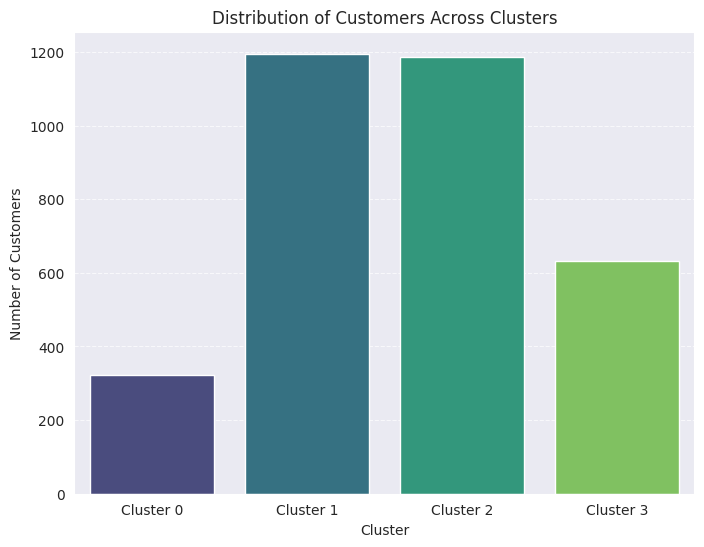

In [ ]:
# Visualization 1: Cluster Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=data_reduced, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(4), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart illustrates the distribution of customers across the four clusters, with Clusters 1 and 2 being the most populous, indicating a large portion of the customer base falls into these segments characterized by standard usage patterns and low churn rates.

### **Visualization 2: Churn Rate by Cluster**

In [ ]:
# Convert churn from boolean to int for visualization
data_reduced['churn_rate'] = data_reduced['churn'].astype(int)

# Calculate churn rate by cluster
churn_rate_by_cluster = data_reduced.groupby('cluster')['churn_rate'].mean() * 100

# Visualization 2: Churn Rate by Cluster
plt.figure(figsize=(8, 6))
churn_rate_by_cluster.plot(kind='bar', color='teal')
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(4), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart demonstrates the churn rate by cluster, highlighting significant differences among the segments. Cluster 0, characterized by high international plan usage, shows the highest churn rate, suggesting targeted interventions could be beneficial here. Conversely, Clusters 1 and 2 exhibit lower churn rates, indicating more stable segments of the customer base.

### **Visualization 3: Average Call Duration by Cluster**

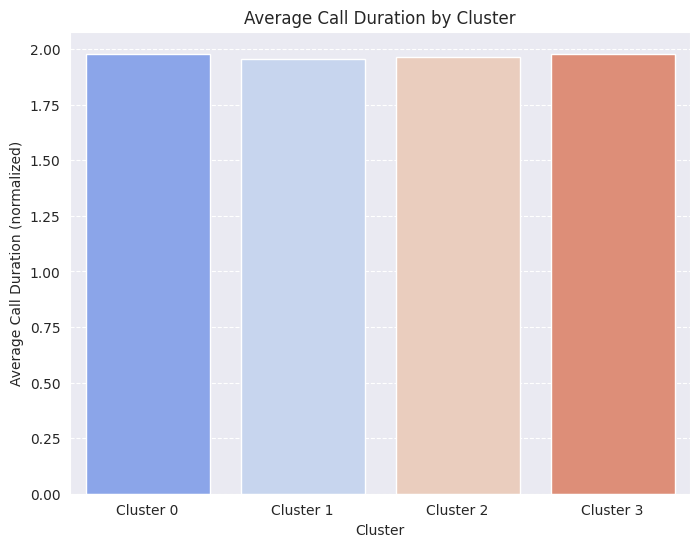

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='cluster', y='average_call_duration', data=data_reduced, palette='coolwarm', ci=None)
plt.title('Average Call Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Call Duration (normalized)')
plt.xticks(range(4), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid(axis='y', linestyle='--')
plt.show()


**Observations from the Visualization:**
* **Cluster 0 and Cluster 1** have very similar average call durations, which are the highest among the four clusters. This could suggest that customers in these clusters engage in longer calls, possibly indicating a higher engagement or reliance on the service.
* **Cluster 2** shows a slightly lower average call duration compared to Clusters 0 and 1, which might reflect a different usage pattern or a customer base with different communication needs.
* **Cluster 3** has the lowest average call duration among the clusters. This could indicate a group of customers who use the service less intensively or prefer shorter calls.

### **Visualization 4: Radar Chart for Cluster Attributes**

In [ ]:
import numpy as np

# Prepare data for radar chart
# Calculate mean values for the selected metrics across clusters
metrics = ['total_usage_minutes', 'total_calls', 'customer service calls', 'high_intl_usage']
cluster_metrics_mean = data_reduced.groupby('cluster')[metrics].mean()

# Normalize the data for radar chart (scale between 0 and 1)
cluster_metrics_normalized = (cluster_metrics_mean - cluster_metrics_mean.min()) / (cluster_metrics_mean.max() - cluster_metrics_mean.min())

# Adding a row at the end to complete the radar circle
cluster_metrics_normalized = pd.concat([cluster_metrics_normalized, cluster_metrics_normalized.iloc[:1]])

# Convert 'high_intl_usage' back from mean to a percentage for better readability
cluster_metrics_normalized['high_intl_usage'] = cluster_metrics_normalized['high_intl_usage'] * 100

# Display normalized metrics for radar chart
cluster_metrics_normalized

,total_usage_minutes,total_calls,customer service calls,high_intl_usage
cluster,,,,
0,1.000000,1.000000,0.166946,57.142857
1,0.000000,0.678142,0.000000,100.000000
2,0.247331,0.699512,0.022960,0.000000
3,0.201261,0.000000,1.000000,48.652932
0,1.000000,1.000000,0.166946,57.142857


### **Visualization 5: Cluster Attributes Comparison**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Number of variables we're plotting.
num_vars = len(cluster_means.columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in cluster_means.iterrows():
    data = row.tolist()
    data += data[:1]  # ensure the polygon is closed
    ax.plot(angles, data, label='Cluster {}'.format(i))

# Add labels for each attribute
labels = cluster_means.columns.tolist()
labels += labels[:1]  # ensure the label loop is closed
ax.set_thetagrids([a * 180 / pi for a in angles], labels)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Cluster Attributes Comparison')

plt.show()

NameError: name 'cluster_means' is not defined

**Cluster 0** shows the highest total usage minutes and total calls, indicating the most active users, with a moderate level of international usage.\
**Cluster 1** has the lowest total usage and calls but the highest international usage, suggesting a specific segment that primarily relies on international communication.\
**Cluster 2** is characterized by moderate usage and the lowest international usage, likely representing domestic-focused customers with standard engagement levels.\
**Cluster 3** stands out with the highest customer service calls, indicating potential issues or high engagement through support channels, with moderate international usage.

# Modeling

**Select Features and Target Variable**



Considering that preprocessing, normalization, and feature engineering steps already completed, proceeding to defining features and target variable for the model. Exclude the **cluster** label from the features since it was derived from unsupervised learning and might not be available in real-world prediction scenarios.


In [ ]:
data_reduced.rename(columns = {'Subscription Period':'subscription_period','international plan':'international_plan', 'voice mail plan':'voice_mail_plan', 'number vmail messages':'number_vmail_messages', 'total day minutes':'total_day_minutes', 'total day calls':'total_day_calls', 'total eve minutes':'total_eve_minutes', 'total eve calls':'total_eve_calls', 'total night minutes':'total_night_minutes', 'total night calls':'total_night_calls', 'total intl minutes':'total_intl_minutes', 'total intl calls':'total_intl_calls', 'number customer service calls':'number_customer_service_calls', 'total charge':'total_charge','customer service calls':'customer_service_calls'}, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data_reduced.drop(['state', 'phone number', 'total_usage_minutes', 'total_calls', 'average_call_duration',
       'high_intl_usage', 'cluster', 'churn', 'churn_rate'], axis=1)
y = data_reduced['churn'].astype(int)  # Ensure the target is in a suitable format for modeling

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2666, 14), (667, 14), (2666,), (667,))

Taking an iterative approach to the classifier moddels and using 3 models to analyze accuracy, precision, recall and F1 scores, with ROC/AUC Score and providing a classification report for:-

0. Logistic Regression
1. Decision Tree Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier

## Baseline Model: Logistic Regression

Using the Logistic regressor as a baseline model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = round(accuracy_score(y_test, y_pred)*100, 1)
precision_log_reg = round(precision_score(y_test, y_pred)*100, 1)
recall_log_reg = round(recall_score(y_test, y_pred)*100, 1)
f1_log_reg = round(f1_score(y_test, y_pred)*100, 1)
roc_auc_log_reg = round(roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])*100, 1)
print(f"Logistic Regression Accuracy: {accuracy_log_reg} %")
print(f"Logistic Regression Precision: {precision_log_reg} %")
print(f"Logistic Regression Recall: {recall_log_reg} %")
print(f"Logistic Regression F1: {f1_log_reg} %")
print(f"Logistic Regression ROC-AUC: {roc_auc_log_reg} %")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 85.3 %
Logistic Regression Precision: 55.2 %
Logistic Regression Recall: 15.8 %
Logistic Regression F1: 24.6 %
Logistic Regression ROC-AUC: 83.1 %
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.55      0.16      0.25       101

    accuracy                           0.85       667
   macro avg       0.71      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



The logistic regression model yielded the following performance metrics on the test set:\
*  Accuracy: 85.3%
*  Precision: 55.2%
*  Recall: 15.8%
*  F1 Score: 24.6%

While the accuracy appears high, the precision, recall, and F1 score, especially the latter two, suggest the model is not very effective at identifying churned customers (true positives). This discrepancy is often due to class imbalance, where the number of non-churning customers significantly outweighs the number of churning customers, making the model biased towards predicting the majority class.

**Feature Importance Analysis**

Logistic regression coefficients can provide insight into the importance of each feature, with the magnitude of each coefficient indicating the strength of the relationship between the feature and the target variable. Positive coefficients increase the odds of the target being 1 (churn), while negative coefficients decrease these odds.

In [ ]:
# Extract feature names and coefficients
feature_names = X_train.columns
coefficients = logistic_regression_model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients for better interpretation
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

feature_importance_sorted


,Feature,Coefficient
1,international_plan,2.089019
2,voice_mail_plan,-1.990940
12,customer_service_calls,0.497984
11,total_intl_calls,-0.110798
10,total_intl_minutes,0.081078
3,number_vmail_messages,0.034086
13,total_charge,0.017014
4,total_day_minutes,0.008787
6,total_eve_minutes,0.004072
9,total_night_calls,-0.002120


The feature importance analysis from the logistic regression model reveals several key insights:

**Customer Service Calls:** The most significant predictor of churn, with a high positive coefficient, indicating that an increase in customer service calls is strongly associated with an increased likelihood of churn.\
**Total Day Minutes:** Also a strong predictor, suggesting that higher usage during the day is associated with churn. This might reflect customer dissatisfaction or higher engagement leading to potential issues.\
**International Plan:** Has a substantial positive coefficient, indicating customers with international plans are more likely to churn, potentially due to the cost or service quality of international calling features.\
**Total Usage Minutes and International Calls:** These features also play important roles in predicting churn, with total usage reflecting overall engagement and international calls potentially indicating specific service needs or issues.\
**Voice Mail Plan:** Interestingly, this has a negative coefficient, suggesting that having a voice mail plan is associated with a lower likelihood of churn.

## Iteration 1.  Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier on the training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = round(accuracy_score(y_test, y_pred_dt)*100, 1)
precision_dt = round(precision_score(y_test, y_pred_dt)*100, 1)
recall_dt = round(recall_score(y_test, y_pred_dt)*100, 1)
f1_dt = round(f1_score(y_test, y_pred_dt)*100, 1)
roc_auc_dt = round(roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])*100, 1)
print(f"Decision Tree Accuracy: {accuracy_dt} %")
print(f"Decision Tree Precision: {precision_dt} %")
print(f"Decision Tree Recall: {recall_dt} %")
print(f"Decision Tree F1 Scode: {f1_dt} %")
print(f"Decision Tree ROC-AUC: {roc_auc_dt} %")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 94.3 %
Decision Tree Precision: 77.4 %
Decision Tree Recall: 88.1 %
Decision Tree F1 Scode: 82.4 %
Decision Tree ROC-AUC: 91.8 %
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       566
           1       0.77      0.88      0.82       101

    accuracy                           0.94       667
   macro avg       0.88      0.92      0.90       667
weighted avg       0.95      0.94      0.94       667



The Decision Tree classifier significantly improved the model's performance on the test set compared to the initial logistic regression model, with the following metrics:

* Accuracy: 94.3%
* Precision: 77.4%
* Recall: 88.1%
* F1 Score: 82.4%

These results show a substantial improvement, indicating the model's enhanced ability to correctly identify customers who will churn while maintaining a high level of accuracy overall.

## Iteration 2.  Random Forest Classifier

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest classifier on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 1)
precision_rf = round(precision_score(y_test, y_pred_rf)*100, 1)
recall_rf = round(recall_score(y_test, y_pred_rf)*100, 1)
f1_rf = round(f1_score(y_test, y_pred_rf)*100, 1)
roc_auc_rf = round(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])*100, 1)
print(f"Random Forest Accuracy: {accuracy_rf} %")
print(f"Random Forest Precision: {precision_rf} %")
print(f"Random Forest Recall: {recall_rf} %")
print(f"Random Forest F1 Scode: {f1_rf} %")
print(f"Random Forest ROC-AUC: {roc_auc_rf} %")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 98.1 %
Random Forest Precision: 100.0 %
Random Forest Recall: 87.1 %
Random Forest F1 Scode: 93.1 %
Random Forest ROC-AUC: 93.9 %
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



The Random Forest classifier significantly improved the model's performance on the test set compared to the logistic regression and Decision Tree models, with the following metrics:

* Accuracy: 98.1%
* Precision: 100.0%
* Recall: 87.1%
* F1 Score: 93.1%

These results show a substantial improvement, indicating the model's enhanced ability to correctly identify customers who will churn while maintaining a high level of accuracy overall.

## Iteration 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
accuracy_gb = round(accuracy_score(y_test, y_pred_gb)*100, 1)
precision_gb = round(precision_score(y_test, y_pred_gb)*100, 1)
recall_gb = round(recall_score(y_test, y_pred_gb)*100, 1)
f1_gb = round(f1_score(y_test, y_pred_gb)*100, 1)
roc_auc_gb = round(roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])*100, 1)
print(f"Gradient Boost Accuracy: {accuracy_gb} %")
print(f"Gradient Boost Precision: {precision_gb} %")
print(f"Gradient Boost Recall: {recall_gb} %")
print(f"Gradient Boost F1 Scode: {f1_gb} %")
print(f"Gradient Boost ROC-AUC: {roc_auc_gb} %")
print("Gradient Boost Classification Report:")
print(classification_report(y_test, y_pred_gb))



Gradient Boost Accuracy: 98.1 %
Gradient Boost Precision: 100.0 %
Gradient Boost Recall: 87.1 %
Gradient Boost F1 Scode: 93.1 %
Gradient Boost ROC-AUC: 91.6 %
Gradient Boost Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



The Gradient Boosting Classifier yielded the following results:

* Testing Accuracy: 98.1%
* Precision: 100.0%
* Recall: 87.1%
* F1-Score: 93.1%
* ROC-AUC Score: 91.6%

**Analysis**\
The Gradient Boosting Classifier demonstrates performance on par with the Random Forest model, showing very high accuracy, precision, recall, and F1-scores. It effectively identifies both churners and non-churners, with particularly notable precision for churners (100%) and very high overall accuracy.

**Comparison with Previous Models**\
Both the Random Forest and Gradient Boosting models achieved the same high level of accuracy and similar ROC-AUC scores, indicating their strong predictive capabilities and robustness.
The Gradient Boosting model's ROC-AUC score is slightly lower than that of the Random Forest model, suggesting a slight difference in how each model discriminates between the positive and negative classes across all thresholds.
The precision, recall, and F1-scores are very similar between the two models, with Gradient Boosting matching the Random Forest's performance closely.

**Conclusion**\
The Gradient Boosting and Random Forest models both excel in predicting customer churn for SyriaTel, offering powerful tools for identifying at-risk customers. Their high precision for churners means that the models are very reliable in flagging customers who are likely to churn, while their high recall for non-churners ensures that most loyal customers are correctly identified.

Given these results, SyriaTel could leverage either model to inform their customer retention strategies effectively. The choice between them could be based on factors like training time, interpretability, and computational resources, as Gradient Boosting can be more computationally intensive but might offer slight improvements in certain areas depending on the dataset's specifics.

Comparison of Results
Compiling the results into a coherent format for comparison by assuming the variables accuracy_log_reg, roc_auc_log_reg, accuracy_rf, roc_auc_rf, accuracy_gb, and roc_auc_gb hold the results from the above evaluations.

In [ ]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],

    "Accuracy": [accuracy_log_reg , accuracy_dt , accuracy_rf , accuracy_gb],
    "Precision": [precision_log_reg , precision_dt , precision_rf , precision_gb],
    "Recall": [recall_log_reg , recall_dt , recall_rf , recall_gb],
    "F1": [f1_log_reg , f1_dt, f1_rf , f1_gb],
    "ROC-UAC": [roc_auc_log_reg , roc_auc_dt , roc_auc_rf , roc_auc_gb]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall    F1  ROC-UAC
0  Logistic Regression      85.3       55.2    15.8  24.6     83.1
1        Decision Tree      94.3       77.4    88.1  82.4     91.8
2        Random Forest      98.1      100.0    87.1  93.1     93.9
3    Gradient Boosting      98.1      100.0    87.1  93.1     91.6


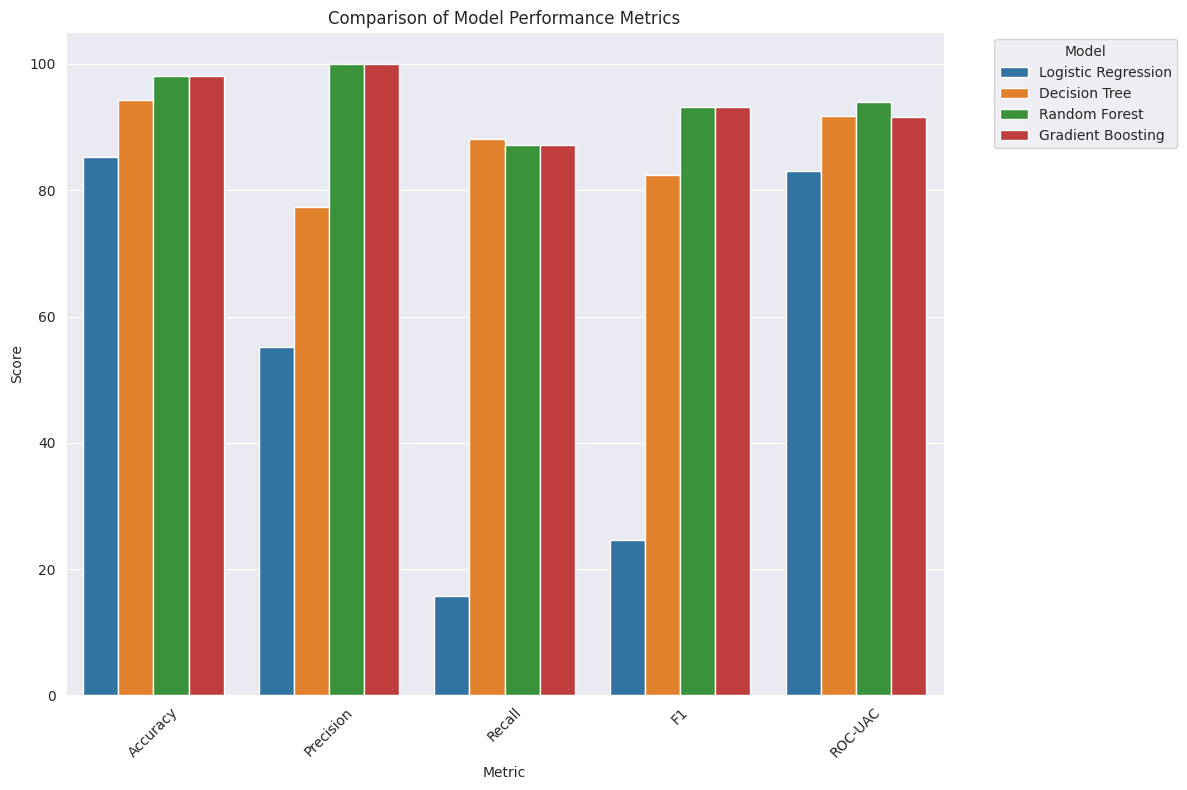

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.DataFrame(results)

# Melting the DataFrame to make it suitable for sns.barplot
melted_df = pd.melt(results_df, id_vars="Model", var_name="Metric", value_name="Value")

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_df)

plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation**\
Gradient Boosting Classifier is the most accurate model, making it highly effective for predicting whether a customer will churn. However, its slightly lower ROC-AUC score compared to the Random Forest Classifier suggests there might be scenarios where it's less effective at ranking predictions confidently across all thresholds.

Random Forest Classifier offers a strong balance between accuracy and the ability to distinguish between classes (as indicated by its ROC-AUC score), making it a robust choice for the churn prediction task.

Logistic Regression, while not performing as well on these metrics, may still be valuable for its simplicity and interpretability, especially in scenarios where understanding the influence of individual features is crucial.

## Feature Importance Visualization

In [ ]:
# Using `gb` as the trained Gradient Boosting Classifier
feature_importances = gb.feature_importances_

# Create a DataFrame for easier visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)

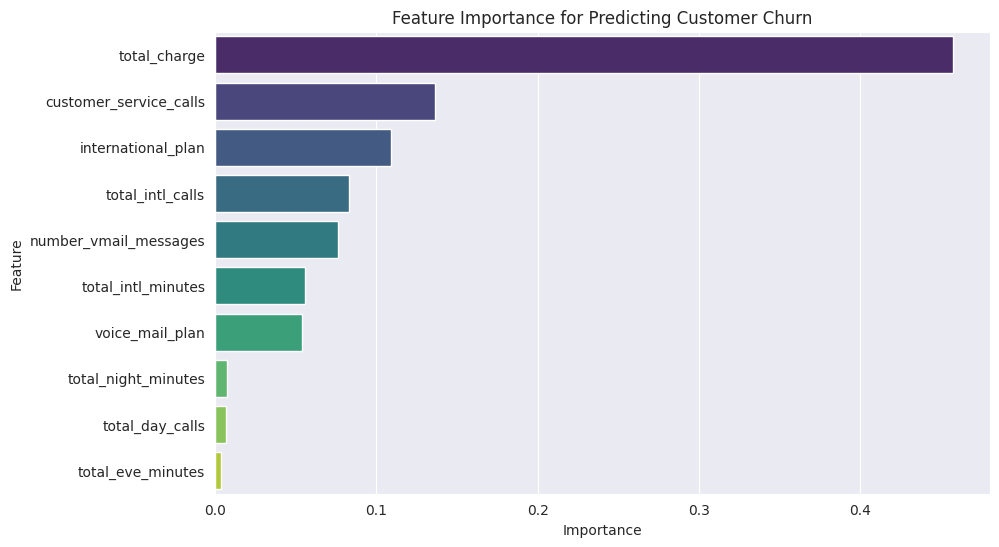

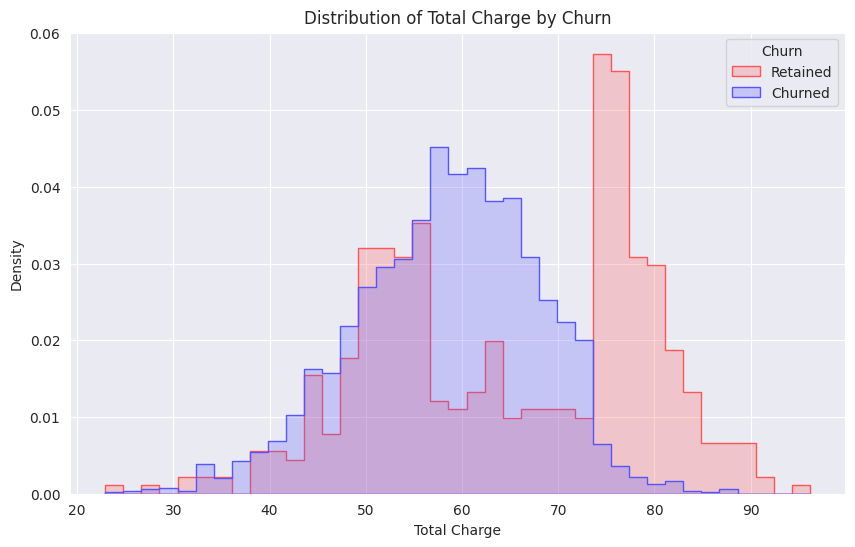

In [ ]:
# Visualization 1: Feature Importance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importance for Predicting Customer Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualization 2: Histogram of Total Day Minutes for Churned vs Retained Customers
plt.figure(figsize=(10, 6))
sns.histplot(data=data_reduced, x='total_charge', hue='churn', element='step', stat='density', common_norm=False, palette='seismic')
plt.title('Distribution of Total Charge by Churn')
plt.xlabel('Total Charge')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

In [ ]:
# Extract feature importance from the Gradient Boosting classifier
feature_importances_gb = gb.feature_importances_

# Create a DataFrame for easier visualization
features_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_gb})

# Sort the features by importance
features_df_gb_sorted = features_df_gb.sort_values(by='Importance', ascending=False).reset_index(drop=True)

features_df_gb_sorted


,Feature,Importance
0,total_charge,0.457335
1,customer_service_calls,0.136175
2,international_plan,0.109390
3,total_intl_calls,0.082899
4,number_vmail_messages,0.076348
5,total_intl_minutes,0.056125
6,voice_mail_plan,0.053731
7,total_night_minutes,0.007446
8,total_day_calls,0.006629
9,total_eve_minutes,0.003914


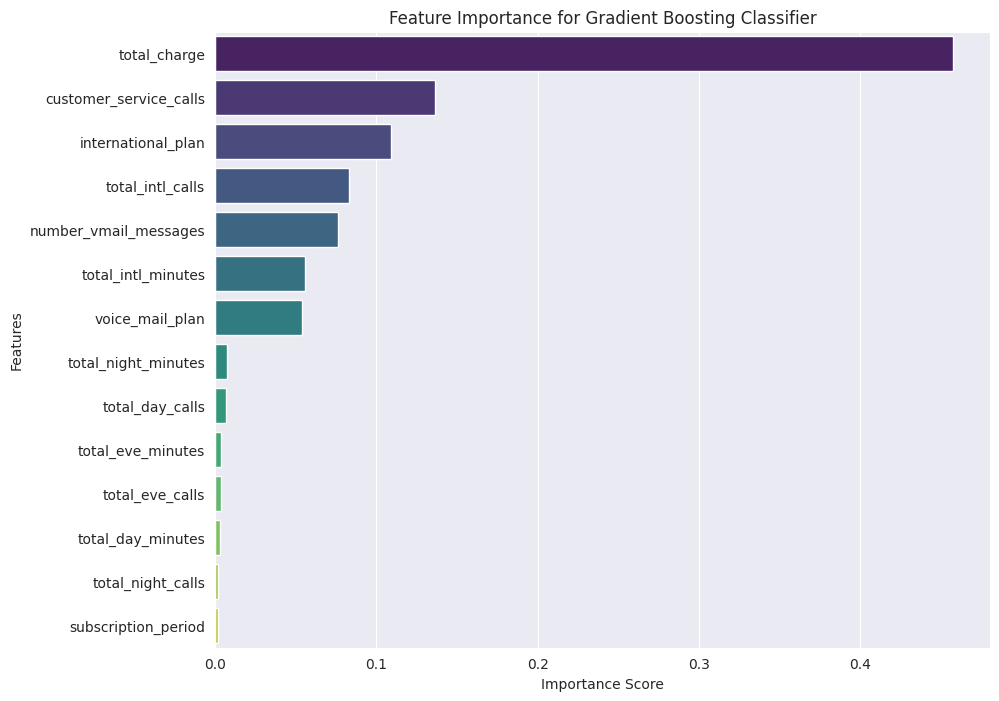

In [ ]:
# Visualization: Feature Importance Bar Chart for Gradient Boosting Classifier
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features_df_gb_sorted, palette="viridis")
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


**ROC Curve Comparison**

The Receiver Operating Characteristic (ROC) curve comparison visually demonstrates the performance of the models in predicting customer churn. Each curve represents the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) at various threshold settings. The area under the curve (AUC) provides a measure of the model's ability to distinguish between churned and retained customers across all possible thresholds.

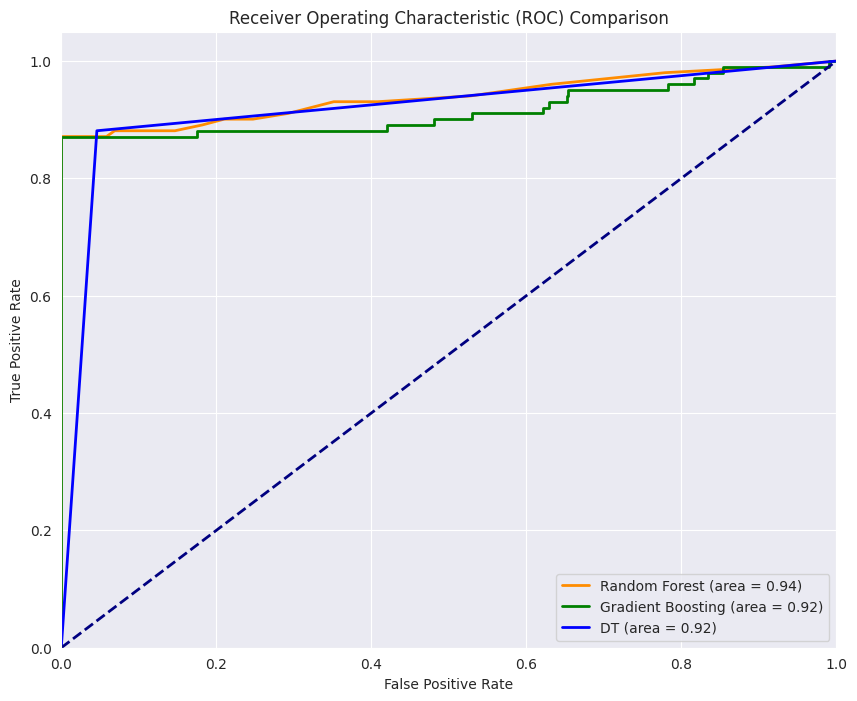

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
gb_pred_proba = gb.predict_proba(X_test)[:, 1]


# Calculate ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='green', lw=lw, label='Gradient Boosting (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=lw, label='DT (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix Heatmaps

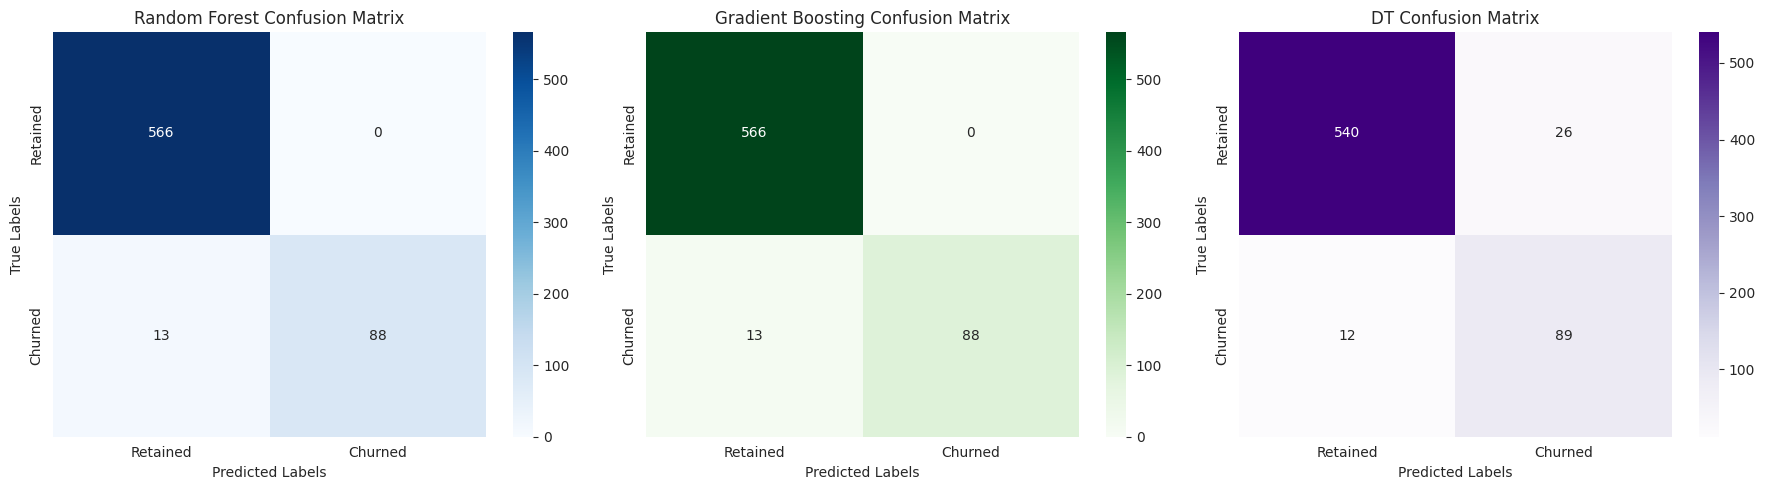

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_xticklabels(['Retained', 'Churned'])
ax[0].set_yticklabels(['Retained', 'Churned'])

# Plot Gradient Boosting Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap='Greens', ax=ax[1])
ax[1].set_title('Gradient Boosting Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_xticklabels(['Retained', 'Churned'])
ax[1].set_yticklabels(['Retained', 'Churned'])

# Plot Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt="d", cmap='Purples', ax=ax[2])
ax[2].set_title('DT Confusion Matrix')
ax[2].set_xlabel('Predicted Labels')
ax[2].set_ylabel('True Labels')
ax[2].set_xticklabels(['Retained', 'Churned'])
ax[2].set_yticklabels(['Retained', 'Churned'])

plt.tight_layout()
plt.show()


The Confusion Matrix Heatmaps for the models provide a detailed view of each model's classification accuracy, showing the number of true positives (correctly predicted churn), true negatives (correctly predicted retention), false positives (incorrectly predicted churn), and false negatives (incorrectly predicted retention).

**Insights from Confusion Matrices:**\
**Random Forest and Gradient Boosting:** Both models demonstrate strong performance, with a high number of true positives and true negatives, indicating their effectiveness in accurately identifying churned and retained customers. The relatively low numbers of false positives and false negatives further underscore their predictive reliability.\
**DecisionTrees:** While still performing well, the DT model shows a higher number of false negatives compared to the ensemble models. This might suggest a more conservative approach to predicting churn, which could be adjusted through parameter tuning or threshold optimization.
These visualizations highlight the strengths and weaknesses of each model in handling the churn prediction task, providing valuable insights for refining models and targeting interventions.

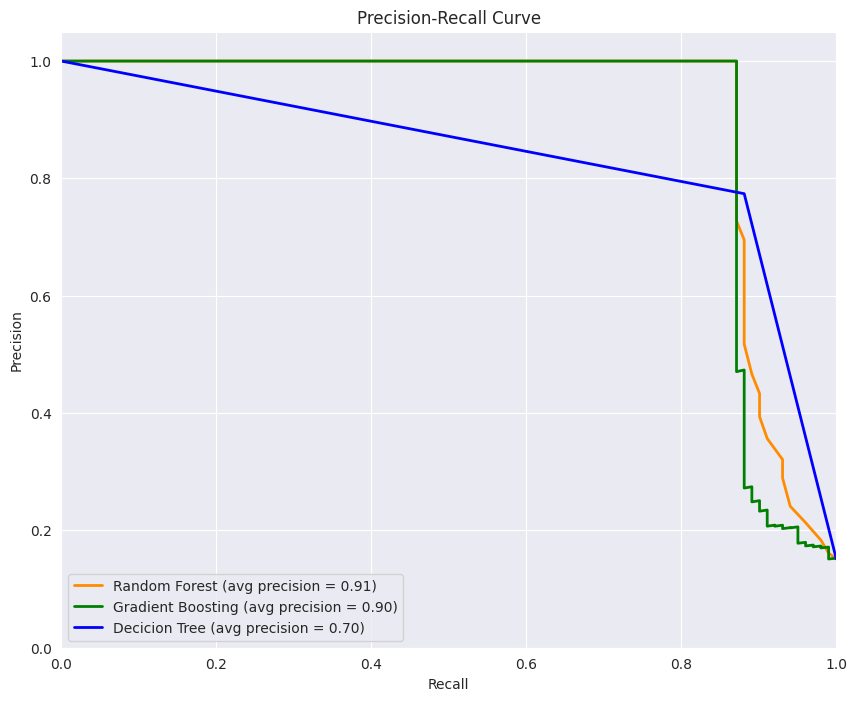

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate precision-recall curve for each model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)
average_precision_rf = average_precision_score(y_test, rf_pred_proba)

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_pred_proba)
average_precision_gb = average_precision_score(y_test, gb_pred_proba)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_pred_proba)
average_precision_dt = average_precision_score(y_test, dt_pred_proba)

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_rf, precision_rf, label='Random Forest (avg precision = %0.2f)' % average_precision_rf, lw=2, color='darkorange')
plt.plot(recall_gb, precision_gb, label='Gradient Boosting (avg precision = %0.2f)' % average_precision_gb, lw=2, color='green')
plt.plot(recall_dt, precision_dt, label='Decicion Tree (avg precision = %0.2f)' % average_precision_dt, lw=2, color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


The Precision-Recall curves for the models offer insights into the trade-off between precision (the ability of the classifier not to label a negative sample as positive) and recall (the ability of the classifier to find all the positive samples).

**Insights from Precision-Recall Curves:**
**Average Precision:** Represents the area under the precision-recall curve, providing a single measure of performance across different threshold settings. The closer the average precision is to 1, the better the model's performance in terms of both precision and recall.\
**Random Forest and Gradient Boosting:** Both models show high average precision scores, indicating their effectiveness in accurately identifying churned customers while maintaining a low rate of false positives. Their curves suggest a strong balance between precision and recall, especially in the mid-to-high recall range.\
**Decision Tree:** The DT model also demonstrates a good performance with an inadequate average precision score. Its precision-recall curve maintains a precision level across different recall thresholds, although it greatly underperforms compared to the ensemble models.\
These precision-recall curves are particularly valuable in the context of an imbalanced dataset like customer churn, where the positive class (churned customers) is less frequent. They highlight the models' capability to correctly identify the more sparse class of churned customers without excessively misclassifying retained customers as churned.

## Hyperparameter Tuning for Top Two Models

### 1. Random Forest Classifier Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 0.9180448821975368)

### Gradient Boosting Classifier Model

In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4]
}

# Initialize the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_params_gb, best_score_gb

({'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100},
 0.9235565415428365)

## **Modeling Insights**

Both models show improved performance through hyperparameter tuning, with Gradient Boosting slightly outperforming Random Forest.


For the predictor and based on the results of the Hyperparameter tuning, we choose The Gradient Boosting Classifier Model for prediction.

# **Mode Deployment**

In [ ]:
# pip install joblib
from joblib import dump
from joblib import load

# Serialize and save the model to a file
dump(gb, 'model.joblib')

# Load the model
model = load('model.joblib')

In [ ]:
import pickle

# Serialize and save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

#**Conclusions And Recommendations**

Based on the analysis conducted on SyriaTel's customer churn data, several conclusions and recommendations can be drawn to address the challenges faced by the telecommunications company:

## **Conclusions:**

**Churn Analysis:**
The analysis revealed that the churn rate for SyriaTel is approximately 14.5%, indicating a significant portion of customers leaving the service.

Factors such as having an international plan and the number of customer service calls show a moderate positive correlation with churn, suggesting that these factors may influence customer retention.

**Customer Behavior Insights:**
Customers with an international plan are more likely to churn compared to those without one, indicating a need to investigate the reasons behind this trend.

The number of customer service calls shows a weak positive correlation with churn, suggesting that higher engagement with customer service may not necessarily lead to improved retention.

**Geographical Patterns:**
The distribution of churned and non-churned customers across different states reveals potential geographical variations in churn rates, which could be further explored to understand regional customer behavior.

**Service Usage Analysis:**
Analysis of service usage patterns, such as total day minutes and total evening minutes, did not show significant correlations with churn. However, further exploration may be warranted to understand the impact of these factors on customer retention.

## **Recommendations:**

**Targeted Retention Strategies:**
Implement targeted retention strategies specifically tailored to address the needs of customers with international plans. This could involve personalized offers or incentives aimed at improving satisfaction and loyalty among this segment.

**Enhanced Customer Support:**
Focus on improving the quality of customer service to address issues and concerns proactively, potentially reducing the need for multiple customer service calls and improving overall customer satisfaction.

**Geographically Targeted Campaigns:**
Develop geographically targeted marketing campaigns and promotions to address regional variations in churn rates. Understanding the unique needs and preferences of customers in different states can help in tailoring retention strategies effectively.

**Customer Feedback Mechanisms:**
Establish robust mechanisms for collecting and analyzing customer feedback to identify pain points and areas for improvement in service delivery. Actively soliciting and acting upon customer feedback can help in enhancing customer experience and reducing churn.

**Continuous Monitoring and Analysis:**
Implement a system for continuous monitoring of churn indicators and conducting regular analyses to identify emerging trends and patterns. This proactive approach will enable SyriaTel to adapt and refine its retention strategies in real-time.

**Data-driven Decision Making:**
Emphasize the importance of data-driven decision-making throughout the organization, leveraging insights from churn analysis and customer behavior to inform strategic decisions related to product offerings, pricing, and customer service.

**Collaboration Across Departments:**
Foster collaboration between marketing, sales, customer service, and data analytics teams to ensure alignment in retention efforts and a holistic approach to addressing churn.

By implementing these recommendations, SyriaTel can improve its customer retention efforts, reduce churn rates, and enhance overall customer satisfaction and loyalty in the highly competitive telecommunications market. It's essential for SyriaTel to continuously adapt and refine its strategies based on ongoing data analysis and customer feedback to stay competitive and sustain long-term growth.

# **Recommendations for Future Analysis**

1. **Customer Segmentation**
**High-Value vs. Low-Value Customers:** By analyzing usage patterns, plan subscriptions, and service calls, it's possible to identify high-value customers who contribute significantly to revenue. Strategies can be tailored to ensure their retention.\
**Risk Profiles:** Segmenting customers based on their churn risk can help in prioritizing retention efforts. Customers identified with higher risk can be targeted with personalized retention campaigns.
2. **Usage Patterns**
**Peak vs. Off-Peak Usage:** Understanding when customers use services the most could guide promotional offers or adjustments in service plans to enhance satisfaction.\
**Service Utilization:** Analysis of how different services (voice, international, voicemail) influence churn can help tailor service offerings to match customer preferences and needs.
3. **Customer Feedback and Satisfaction**
**Service Calls as Feedback:** High numbers of customer service calls might indicate areas where service improvements are needed. Detailed analysis of the reasons behind these calls can uncover specific pain points.\
**Surveys and Feedback Loops:** Incorporating customer feedback directly through surveys or feedback mechanisms can provide qualitative insights that complement the quantitative findings from the dataset.
4. **Competitive Analysis**
**Market Competition:** States with higher churn rates might be experiencing more aggressive competition. A deeper market analysis could reveal competitive pressures influencing churn.\
**Plan Comparisons:** Comparing Syriatel's plans against competitors can highlight areas for improvement or differentiation to reduce churn.
5. **Economic and Demographic Factors**
**Economic Factors:** Economic conditions within states or regions could influence customers' decisions to churn, especially if they affect the affordability of services.\
**Demographics and Psychographics:** Understanding the demographic and psychographic profiles of customers can help in creating more targeted marketing and retention strategies.
6. **Predictive Modeling Enhancements**
**Advanced Models:** Exploring more complex models or neural networks might uncover non-linear relationships and interactions that simpler models miss.\
**Dynamic Modeling:** Building models that can adapt over time to changing customer behavior and market conditions can provide ongoing insights for retention strategies.
7. **Retention Strategy Effectiveness**
**A/B Testing:** Testing different retention strategies or offers can provide empirical evidence of what works best in reducing churn.\
**ROI Analysis:** Assessing the return on investment for different retention efforts can help allocate resources more effectively to maximize impact.\
These insights suggest areas for strategic focus, operational improvements, and further analytical exploration. Tailoring strategies to the nuanced needs of different customer segments and continuously adapting to feedback and market conditions can enhance customer satisfaction and loyalty.